In [65]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics

def printmd(string):
    display(Markdown(string))
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


%  matplotlib inline

UsageError: Line magic function `%` not found.


In [66]:
adult = pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 1. Preliminary Data Analysis

In [67]:
# Setting all the categorical columns to type category
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
printmd('## 1.1. Columns and their types')
print(adult.info())

## 1.1. Columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


In [68]:
# Top 5 records
printmd('## 1.2. Data')
adult.head()

## 1.2. Data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Numerical Data

In [69]:
printmd('## 1.3. Summary Statistics')

data_numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(adult.select_dtypes(include=data_numerics).columns)
print(adult.select_dtypes(include=data_numerics).shape)
data_numerics = adult.select_dtypes(include=data_numerics)
data_numerics.describe()

## 1.3. Summary Statistics

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

(48842, 6)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\li

<function matplotlib.pyplot.show(close=None, block=None)>

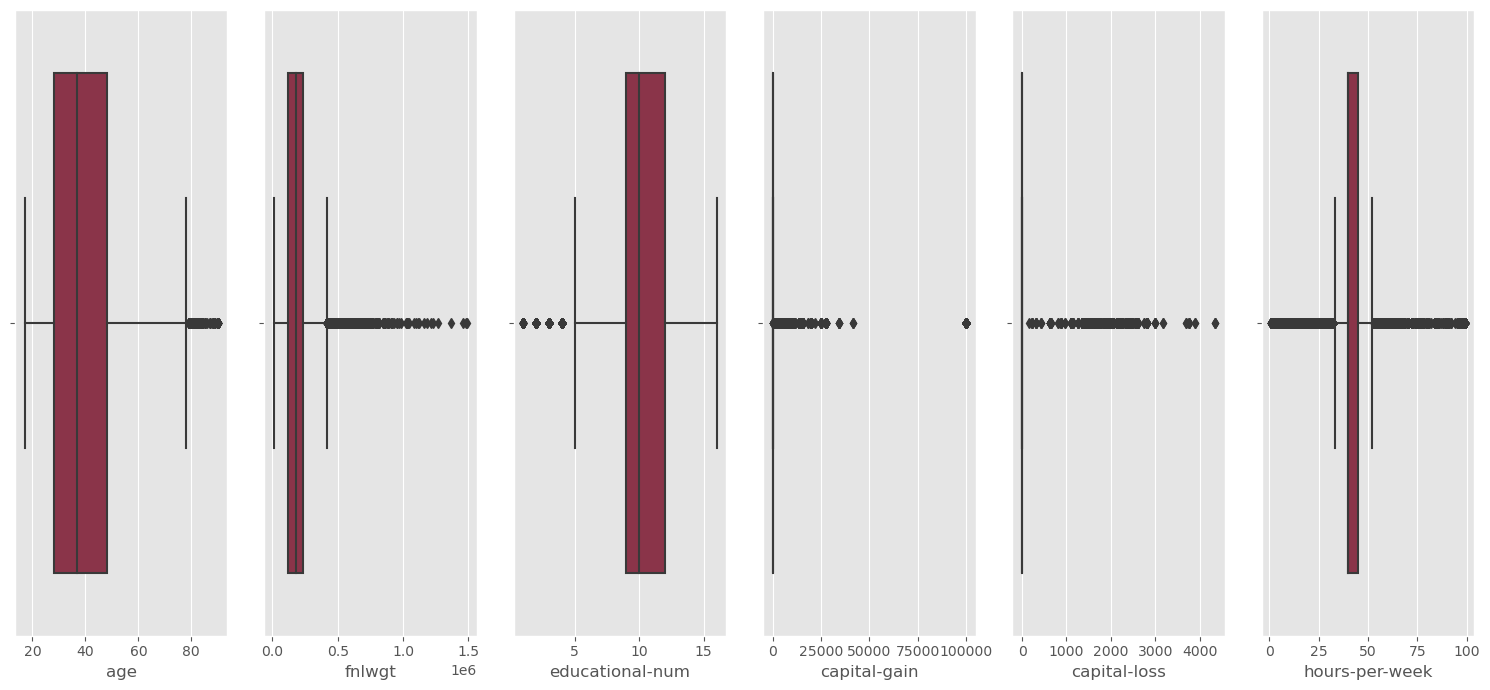

In [70]:
import seaborn as sns
features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(adult[features[i]],color='#982642')
    plt.tight_layout()
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

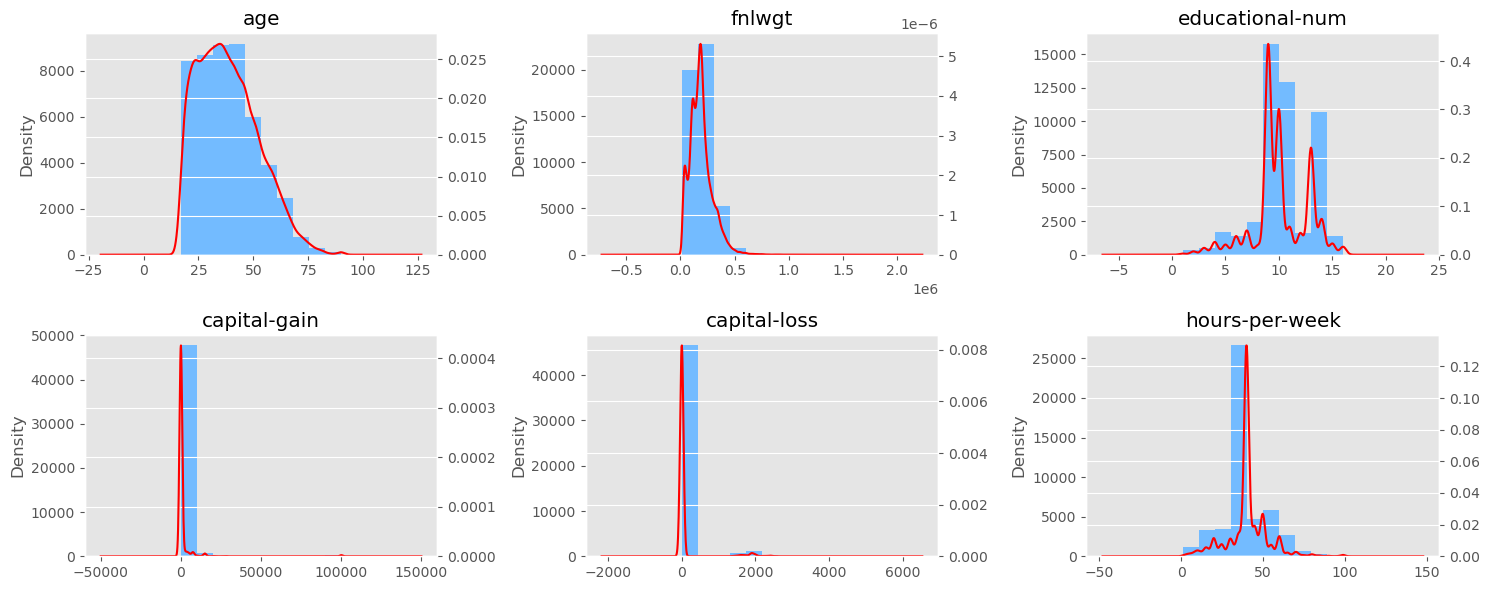

In [71]:
data_num = adult[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#73bbff')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
plt.show

# Non-Numerical Data

In [72]:
display(adult.select_dtypes(include=['object']).columns)
print(adult.select_dtypes(include=object).shape)
data_cat = adult.select_dtypes(include=['object'])
#data_cat.describe(['object'])

Index([], dtype='object')

(48842, 0)


In [73]:
printmd('## 1.3.1. check unique values')
col=adult.columns
data_type=adult.dtypes
uniq=adult.nunique()

print("\n%30s  %10s   %10s\n " % ("Column Name", "Data Type", "Unique Values"))
for i in range(len(adult.columns)):
    print("%30s  %10s   %10s " % (col[i],data_type[i],uniq[i]))

print("\nDimensions:",adult.shape[0],'rows and ',adult.shape[1],'columns')

## 1.3.1. check unique values


                   Column Name   Data Type   Unique Values
 
                           age       int64           74 
                     workclass    category            9 
                        fnlwgt       int64        28523 
                     education    category           16 
               educational-num       int64           16 
                marital-status    category            7 
                    occupation    category           15 
                  relationship    category            6 
                          race    category            5 
                        gender    category            2 
                  capital-gain       int64          123 
                  capital-loss       int64           99 
                hours-per-week       int64           96 
                native-country    category           42 
                        income    category            2 

Dimensions: 48842 rows and  15 columns


In [75]:
printmd('## 1.4. Missing values')
for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        printmd(str(i) + ': ' + str(j) + ' records')

## 1.4. Missing values

workclass: 2799 records

occupation: 2809 records

native-country: 857 records

# Treating Missing Values by predicting them
**I fill the missing values in each of the three columns by predicting their values. For each of the three columns, I use all the attributes (including 'income') as independent variables and treat that column as the dependent variable, making it a multi-class classification task. I use three classification algorithms, namely, logistic regression, decision trees and random forest to predict the class when the value is missing (in this case a '?'). I then take a majority vote amongst the three classifiers to be the class of the missing value. In case of a tie, I pick the majority class of that column using the entire dataset.**

In [76]:
# Create one hot encoding of the categorical columns in the data frame.
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [77]:
printmd('### 1.4.1. Filling in missing values for Attribute workclass')

test_data = adult[(adult.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = adult[(adult.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

#log_reg = LogisticRegression()
#log_reg.fit(train_data, train_label)
#log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = adult.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.workclass.values == '?'),'workclass'] = overall_pred.values
print(adult.workclass.value_counts())
print(adult.workclass.unique())

### 1.4.1. Filling in missing values for Attribute workclass

Private             35805
Self-emp-not-inc     3873
Local-gov            3145
State-gov            1982
Self-emp-inc         1695
Federal-gov          1433
Never-worked          888
Without-pay            21
?                       0
Name: workclass, dtype: int64
['Private', 'Local-gov', 'Never-worked', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay']
Categories (8, object): ['Private', 'Local-gov', 'Never-worked', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay']


In [78]:
printmd('### 1.4.2. Filling in missing values for Occupation occupation')

test_data = adult[(adult.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = adult[(adult.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

#log_reg = LogisticRegression()
#log_reg.fit(train_data, train_label)
#log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = adult.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.occupation.values == '?'),'occupation'] = overall_pred.values
print(adult.occupation.value_counts())
print(adult.occupation.unique())

### 1.4.2. Filling in missing values for Occupation occupation

Prof-specialty       8102
Craft-repair         6227
Exec-managerial      6137
Adm-clerical         5870
Sales                5581
Other-service        5134
Machine-op-inspct    3068
Transport-moving     2398
Handlers-cleaners    2099
Farming-fishing      1508
Tech-support         1460
Protective-serv       991
Priv-house-serv       252
Armed-Forces           15
?                       0
Name: occupation, dtype: int64
['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Other-service', ..., 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']
Length: 14
Categories (14, object): ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', ..., 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']


In [79]:
printmd('### 1.4.3. Filling in missing values for Native Country')

test_data = adult[(adult['native-country'].values == '?')].copy()
test_label = test_data['native-country']

train_data = adult[(adult['native-country'].values != '?')].copy()
train_label = train_data['native-country']

test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

#log_reg = LogisticRegression()
#log_reg.fit(train_data, train_label)
#log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = adult['native-country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult['native-country'].values == '?'),'native-country'] = overall_pred.values
print(adult['native-country'].value_counts())
print(adult['native-country'].unique())

### 1.4.3. Filling in missing values for Native Country

United-States                 44654
Mexico                          957
Philippines                     306
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           155
Cuba                            138
England                         127
China                           124
South                           120
Jamaica                         107
Italy                           105
Dominican-Republic              103
Japan                            95
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           66
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [80]:
# Resetting the categories

adult['workclass'] = adult['workclass'].cat.remove_categories('?')
adult['occupation'] = adult['occupation'].cat.remove_categories('?')
adult['native-country'] = adult['native-country'].cat.remove_categories('?')

In [81]:
printmd('## 1.5. Correlation Matrix')

display(adult.corr())

printmd('We see that none of the columns are highly correlated.')

## 1.5. Correlation Matrix

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


We see that none of the columns are highly correlated.

# 2. Exploratory Analysis

In [82]:
printmd('## 2.0.1. Visualising the various values under the categorical columns.')
from collections import Counter
occupatn=dict(Counter(adult['occupation'])).keys()
print('Occupation types:','\n',list(occupatn),'\n')
race=dict(Counter(adult['race'])).keys()
print('Race types:','\n',list(race),'\n')
relation=dict(Counter(adult['relationship'])).keys()
print('Relation types:','\n',list(relation),'\n')
educate=dict(Counter(adult['education'])).keys()
print('Education levels:','\n',list(educate),'\n')
marital=dict(Counter(adult['marital-status'])).keys()
print('Marital status levels:','\n',list(marital),'\n')
work=dict(Counter(adult['workclass'])).keys()
print('Workclass levels:','\n',list(work),'\n')
country=dict(Counter(adult['native-country'])).keys()
print('Native countries:','\n',list(country),'\n')

## 2.0.1. Visualising the various values under the categorical columns.

Occupation types: 
 ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'] 

Race types: 
 ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'] 

Relation types: 
 ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative'] 

Education levels: 
 ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'] 

Marital status levels: 
 ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse'] 

Workclass levels: 
 ['Private', 'Local-gov', 'Never-worked', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay'] 

Native countries: 
 ['United-States', 'Peru',

### Finding the correlation of all the other variables with the dependent variable. I will create a heatmap for the same. Look at the last row which is the 'income' and check the correlation. The variables which seem to have no or negative correlation with the dependent variable, I will drop it.

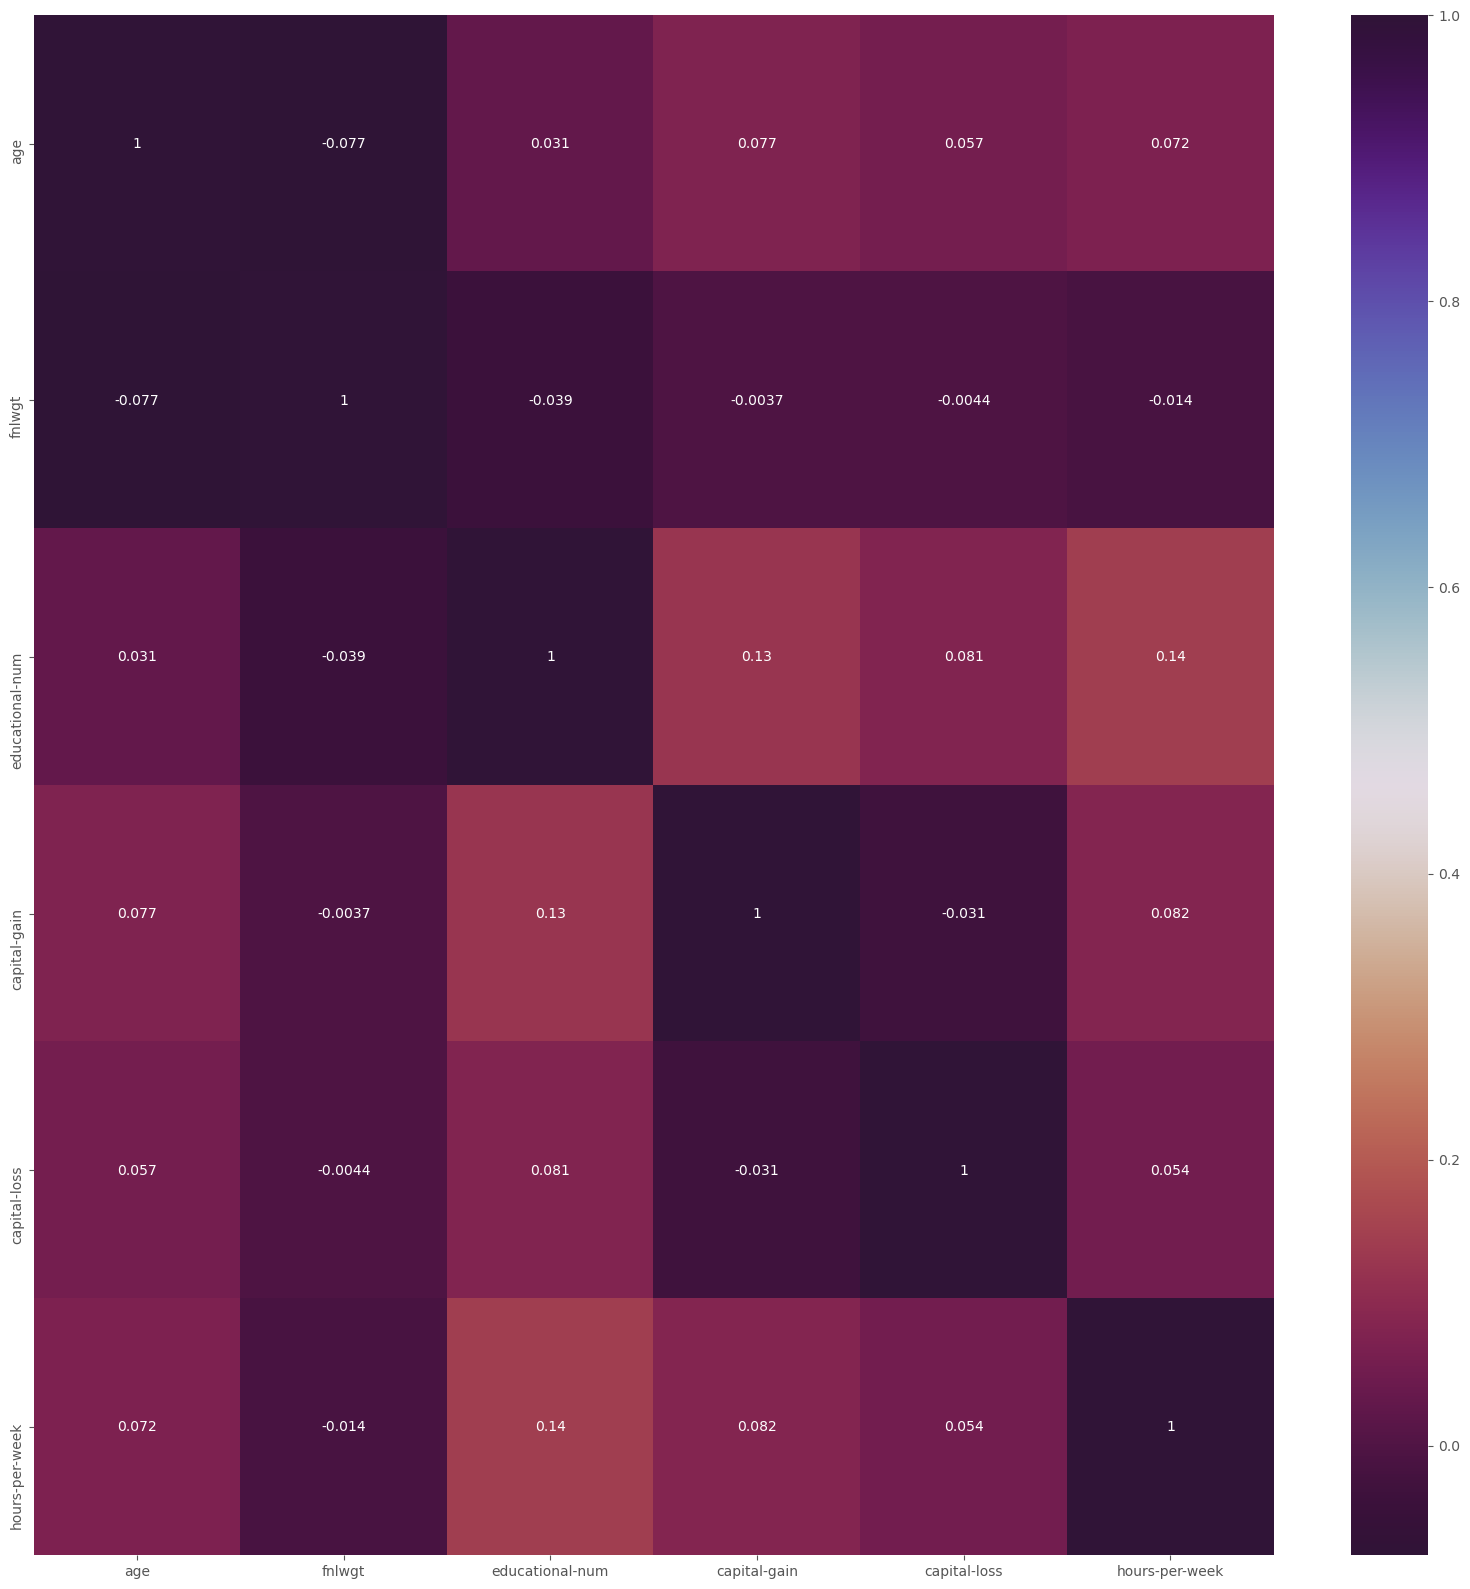

In [83]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = adult.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(adult[top_corr_features].corr(),annot=True,cmap="twilight_shifted_r")

**The range of correlation is from -1 to +1. On the right hand side there is a reference given so that by the colour on the heatmap the correlation can be easily determined. Here, 'fnlwgt' correlate nagatively with the 'income' and hence I will drop it. Also, in a correlation heatmap all the diagonal elements will be 1 indicating high correlation as they correlate with themselves.**

**A statistical test called point biserial correlation is used to measure the relationship between a binary variable x and a continuous variable y. It works on the same concept of a correlation coefficient. I will print the correlation coefficient to check which variables to drop. Since it works only between continuous and binary variables, I will use this for the 5 continuous variables in the dataset.**

In [84]:
#adult['income'].replace({'<=50K':0,'>50K':1},inplace=True)
#adult_new=adult_new.drop('education.num',axis=1)

In [85]:
#import scipy.stats as stats
#a=['age','capital-loss','capital-gain','hours-per-week','fnlwgt']
#for i in a:
#    print(i,':',stats.pointbiserialr(adult['income'],adult[i])[0])

#### As above, the 'fnlwgt' has a negative correation with 'income' and hence I will drop the column and the remaining varibales are such.

In [86]:
adult_new=adult.drop('fnlwgt',axis=1)
adult_new.dtypes

age                   int64
workclass          category
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
gender             category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
income             category
dtype: object

# Level 1 feature selection using chi square estimate

To measure the correlation between 2 categorical variables, I will use the chi-square estimate. The chi-square gives me a contingency table and calculates the p-value and the chi-square estimate. The hypothesis of the chi-square test is

H0: variable not related.

H1: variables related.

I set the value of alpha as 0.01. If the p-value is less than alpha, I will reject H0 and hence the variables are related.

In [87]:
adult_new.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Never-worked,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### I see that all the categorical variables contribute to 'income'. Hence, I keep all of them.

In [90]:
pd.crosstab(adult.relationship,adult_new['income'])

income,<=50K,>50K
relationship,,
Husband,10870,8846
Not-in-family,11307,1276
Other-relative,1454,52
Own-child,7470,111
Unmarried,4816,309
Wife,1238,1093


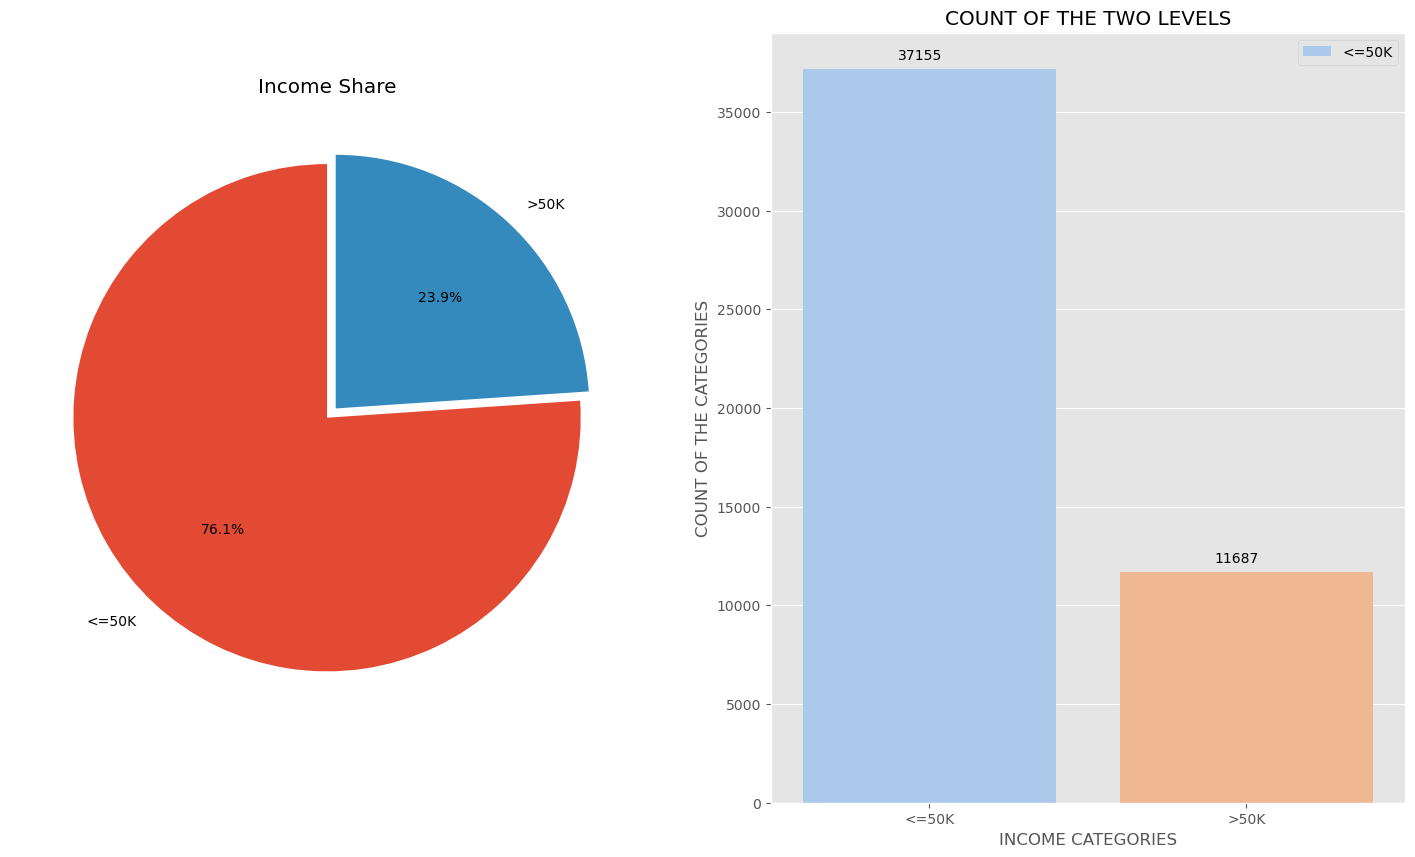

In [91]:
f,ax=plt.subplots(1,2,figsize=(18,10))
#plt.figure(figsize=(7,10))
income1=adult_new['income'].value_counts()
ax[0].pie(income1,explode=(0,0.05),autopct='%1.1f%%',startangle=90,labels=['<=50K','>50K'])
ax[0].set_title('Income Share')
ax[1]=sns.countplot(x='income',data=adult_new,palette='pastel')
ax[1].legend(labels=['<=50K','>50K'])
ax[1].set(xlabel="INCOME CATEGORIES")
ax[1].set(ylabel='COUNT OF THE CATEGORIES')
ax[1].set_title('COUNT OF THE TWO LEVELS')

for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+500))

### There is a total of 48862 observations with 11684 people earning more than 50K and 37155 earning less than or equal to 50K.

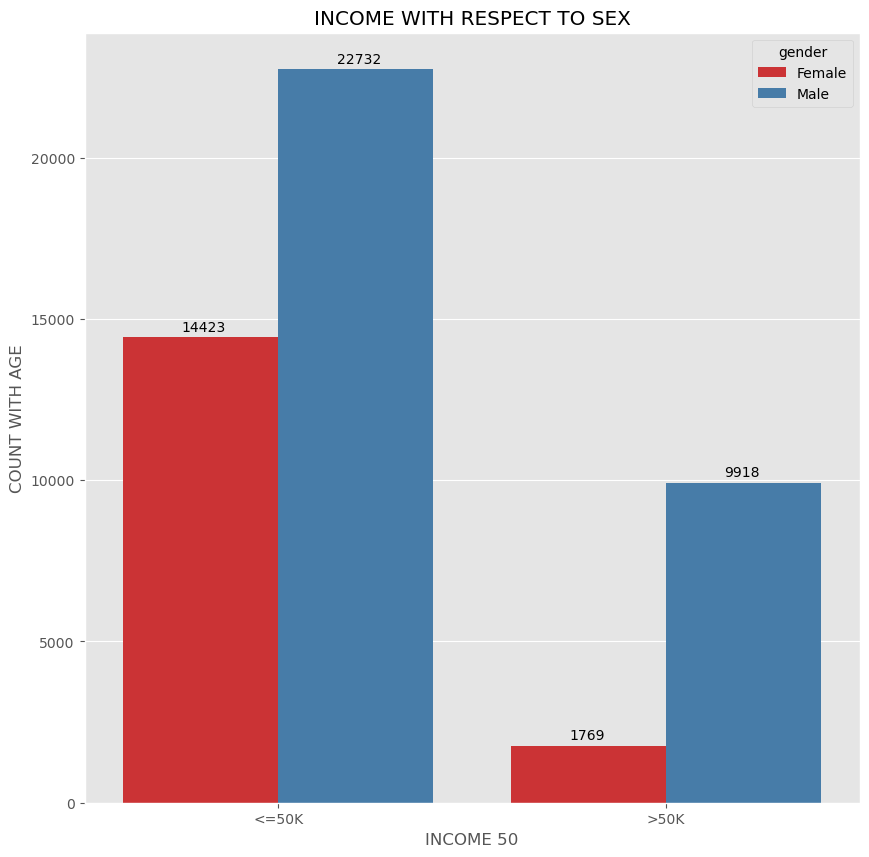

In [92]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='income',hue='gender',data=adult_new,palette='Set1')
ax.set(xlabel='INCOME 50')
ax.set(ylabel='COUNT WITH AGE')
ax.set_title('INCOME WITH RESPECT TO SEX')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15,p.get_height()+200))


In [93]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

## 2.1. Education vs Income

I plot a bar graph showing the proportion of income classes across education levels         in the figure below. As one would expect, we see from the bar graph below that as the         education level increase, the proportion of people who earn more than 50k a year also         increase. It is interesting to note that only after a master's degree, the proportion of         people earning more than 50k a year, is a majority.

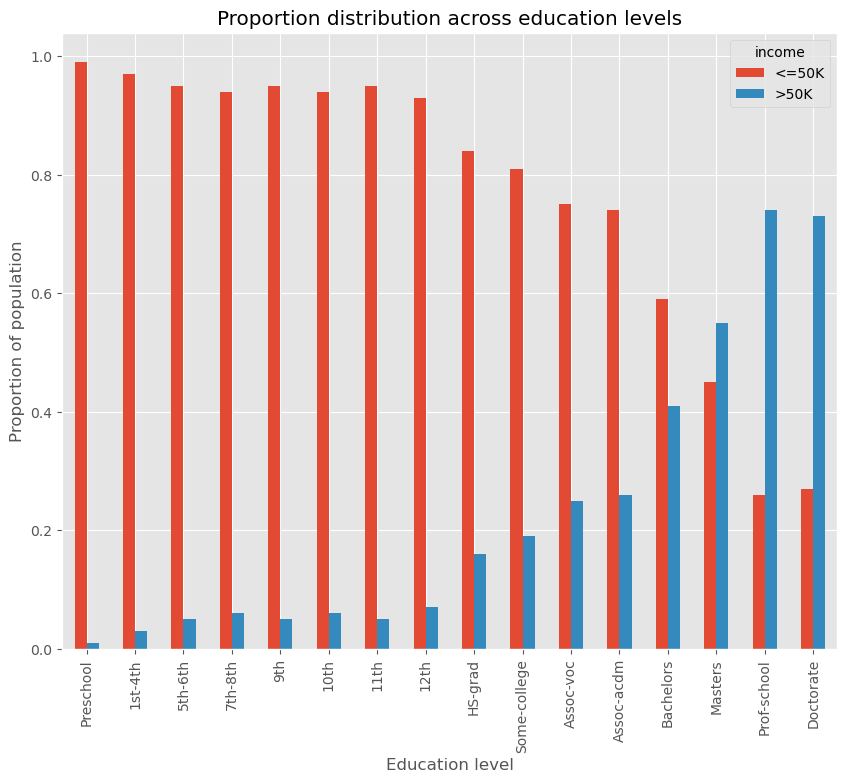

In [94]:
printmd('## 2.1. Education vs Income')

education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

printmd('I plot a bar graph showing the proportion of income classes across education levels \
        in the figure below. As one would expect, we see from the bar graph below that as the \
        education level increase, the proportion of people who earn more than 50k a year also \
        increase. It is interesting to note that only after a master\'s degree, the proportion of \
        people earning more than 50k a year, is a majority.')

## 2.2 Gender vs Income

We plot a bar graph showing the proportion of income classes across the genders in figure         below. From the graph, at an overall view, there exists a wage gap between females and males.         Since we do not have the exactly value of the income, we are limited to only observing that the         proportion of males earning more than 50k a year is more than double of their female counterparts.        

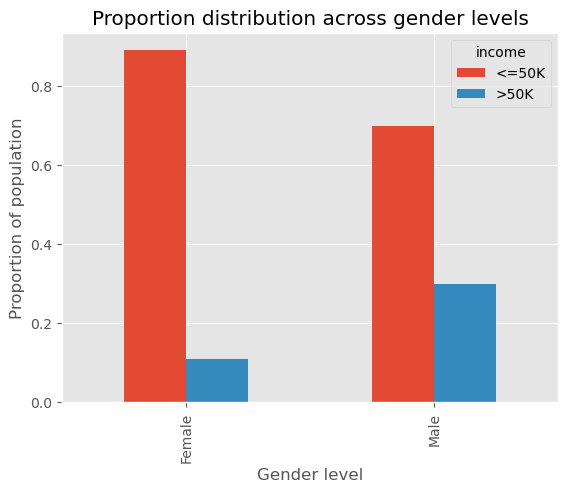

In [95]:
printmd('## 2.2 Gender vs Income')

gender = round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

printmd('We plot a bar graph showing the proportion of income classes across the genders in figure \
        below. From the graph, at an overall view, there exists a wage gap between females and males. \
        Since we do not have the exactly value of the income, we are limited to only observing that the \
        proportion of males earning more than 50k a year is more than double of their female counterparts.\
        ')

Taking a closer look at the disparity in income between men and women, plot the         proportion of men and women who earn more than 50k a year, across all the working         classes as seen in Fig. 3. We see that men always have a higher proportion earning         more than 50k a year than women, except for the 'without.pay' working class, where         they have the same proportion.

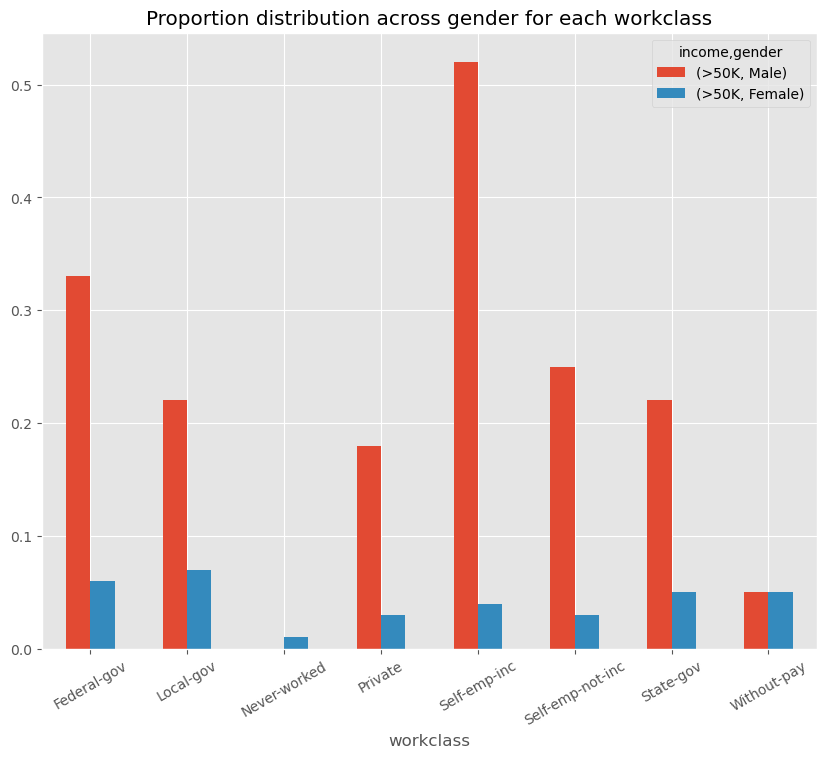

In [96]:
gender_workclass = round(pd.crosstab(adult.workclass, [adult.income, adult.gender]).div(pd.crosstab(adult.workclass, [adult.income, adult.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

printmd('Taking a closer look at the disparity in income between men and women, plot the \
        proportion of men and women who earn more than 50k a year, across all the working \
        classes as seen in Fig. 3. We see that men always have a higher proportion earning \
        more than 50k a year than women, except for the \'without.pay\' working class, where \
        they have the same proportion.')

## 2.3. Occupation vs Income

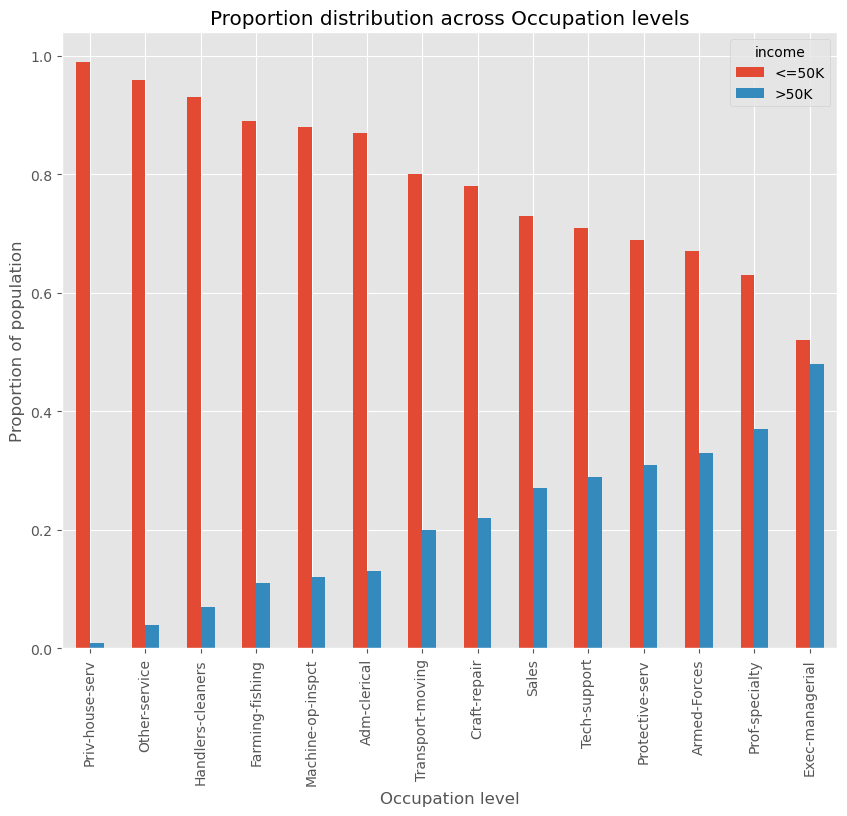

In [97]:
printmd('## 2.3. Occupation vs Income')

occupation = round(pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

## 2.4. Workclass vs Income

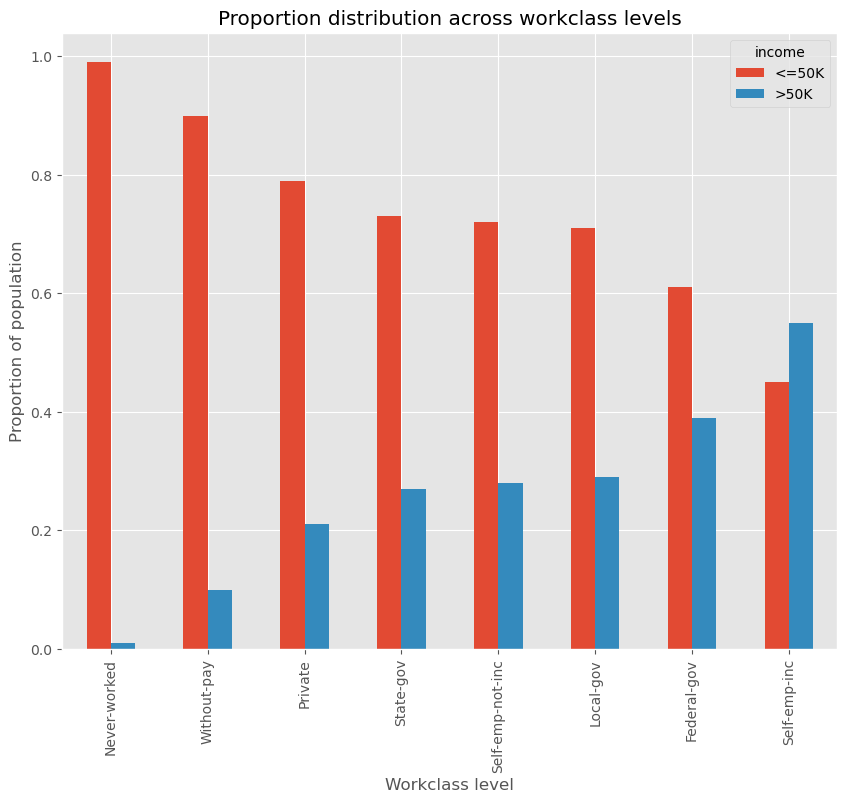

In [98]:
printmd('## 2.4. Workclass vs Income')

workclass = round(pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

## 2.5. Race vs Income

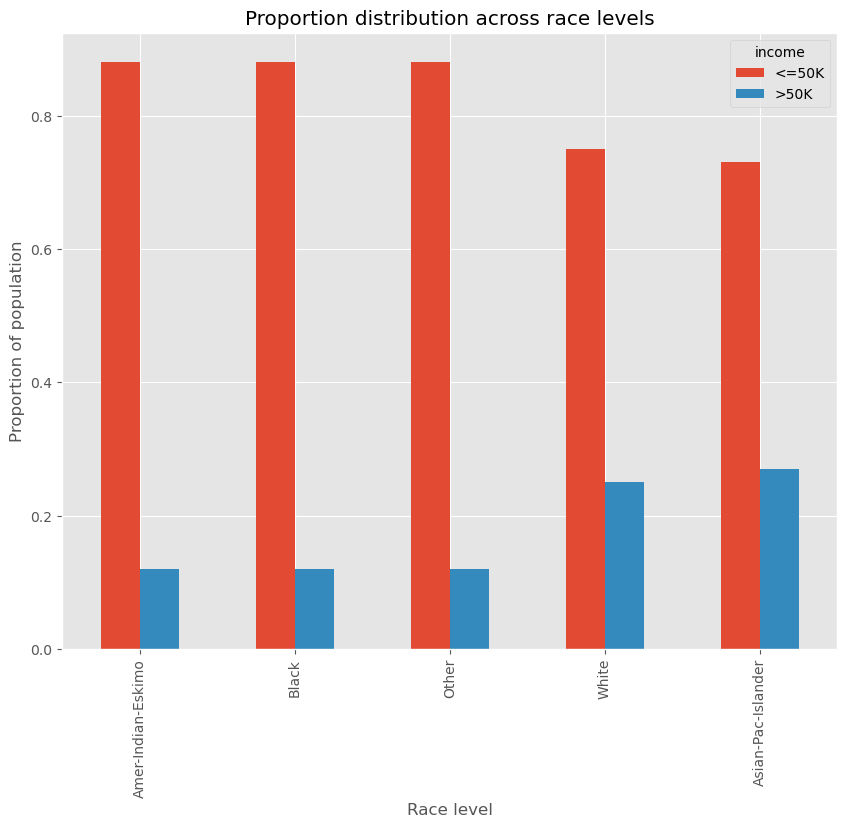

In [99]:
printmd('## 2.5. Race vs Income')

race = round(pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')
print()

## 2.6. Native Country

I plot a bar graph showing the proportion of income classes across the native country in figure         below. From the graph, we notice a trend in positioning of the country. South American country are         at the left end of the plot, with low proportion of population that make more than 50k a year. The         United States is located somewhat centrally, and at the right are countries from Europe and Asia,         with higher proportion of population that make more than 50k a year.

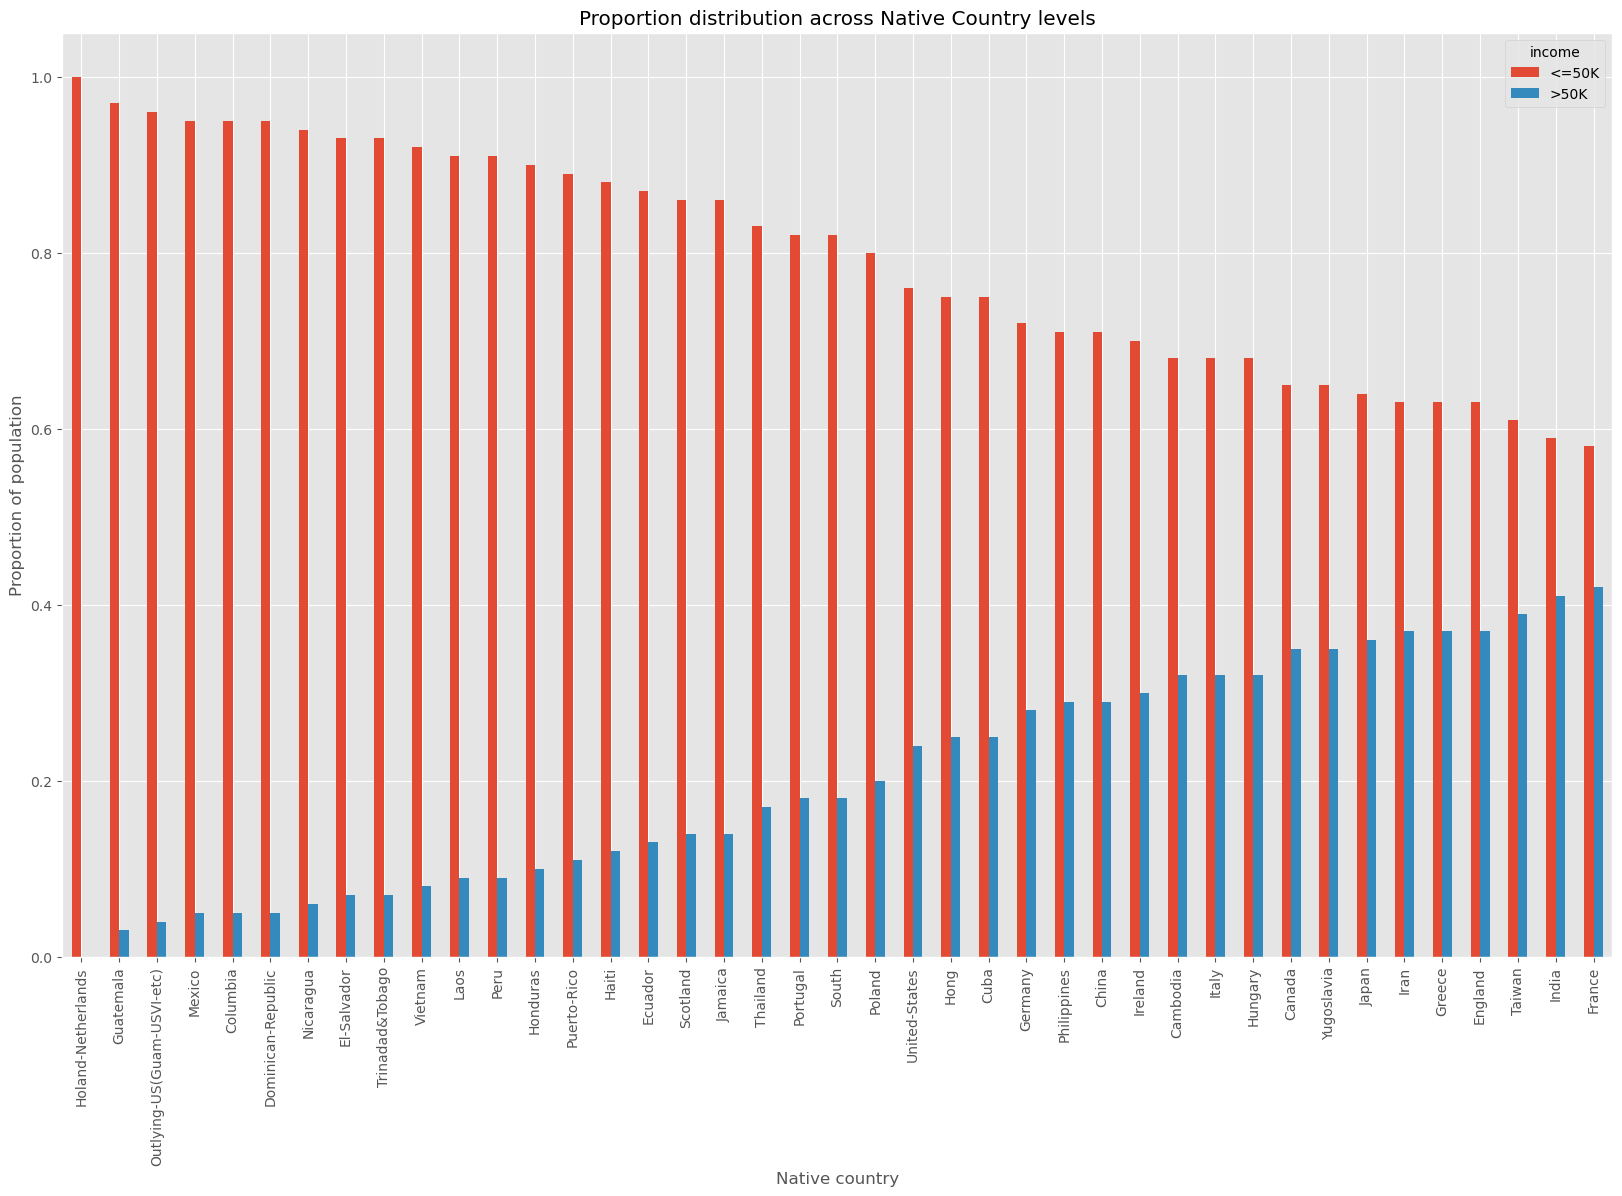

In [100]:
printmd('## 2.6. Native Country')

native_country = round(pd.crosstab(adult['native-country'], adult.income).div(pd.crosstab(adult['native-country'], adult.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

printmd('I plot a bar graph showing the proportion of income classes across the native country in figure \
        below. From the graph, we notice a trend in positioning of the country. South American country are \
        at the left end of the plot, with low proportion of population that make more than 50k a year. The \
        United States is located somewhat centrally, and at the right are countries from Europe and Asia, \
        with higher proportion of population that make more than 50k a year.')

## 2.7. Hours per week vs Income

I plot a bar graph showing the proportion of income classes across the hours worked.         We would expected to notice a trend that higher the hours worked per week, the higher the proportion         of population making more than 50k a year. However, this was not necessarily true from the graph.         For several hours instance (for example, where hours worked was 77, 79, 81, 82, 87, 88 and so on)         no one earned more than 50k a year. 

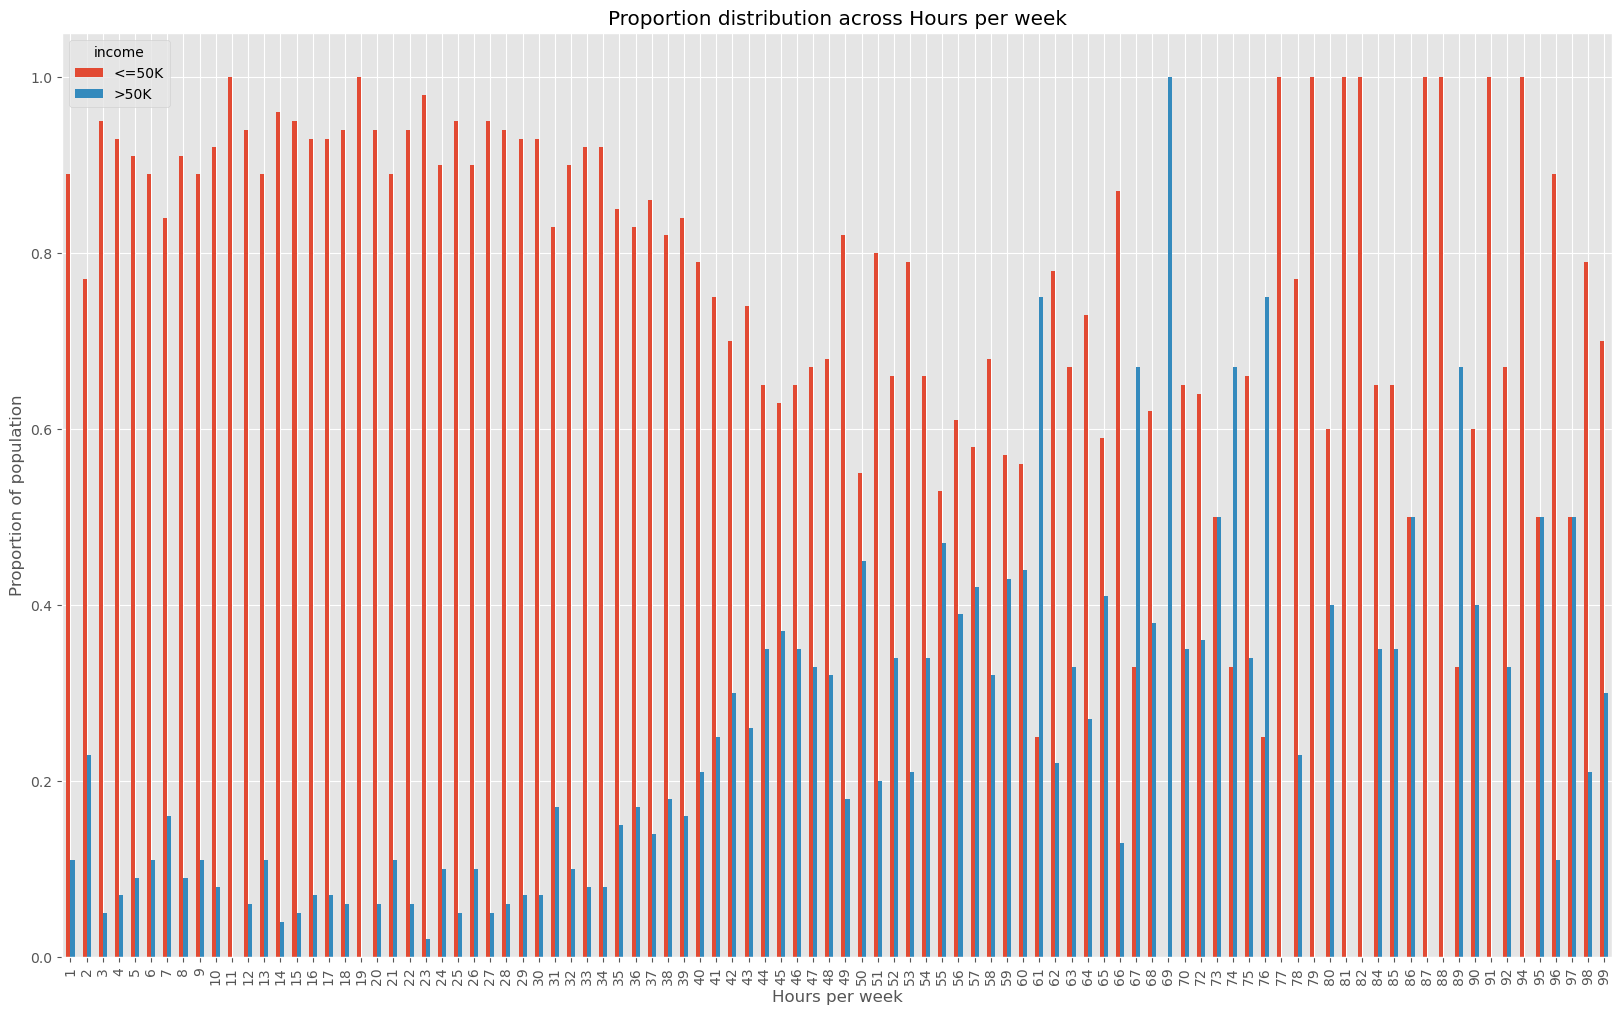

In [101]:
printmd('## 2.7. Hours per week vs Income')

hours_per_week = round(pd.crosstab(adult['hours-per-week'], adult.income).div(pd.crosstab(adult['hours-per-week'], adult.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

printmd('I plot a bar graph showing the proportion of income classes across the hours worked. \
        We would expected to notice a trend that higher the hours worked per week, the higher the proportion \
        of population making more than 50k a year. However, this was not necessarily true from the graph. \
        For several hours instance (for example, where hours worked was 77, 79, 81, 82, 87, 88 and so on) \
        no one earned more than 50k a year. ')

### 2.7.1 Hours per week with categories

Therefore, I decided to transform this column into 3 categories, less than 40 hours,         40 to 60 hours and greater than 60 hours. Plotting a bar graph with these 3 categories,         we can see from the figure below that there is an increasing trend in the proportion of         population making more than 50k a year.

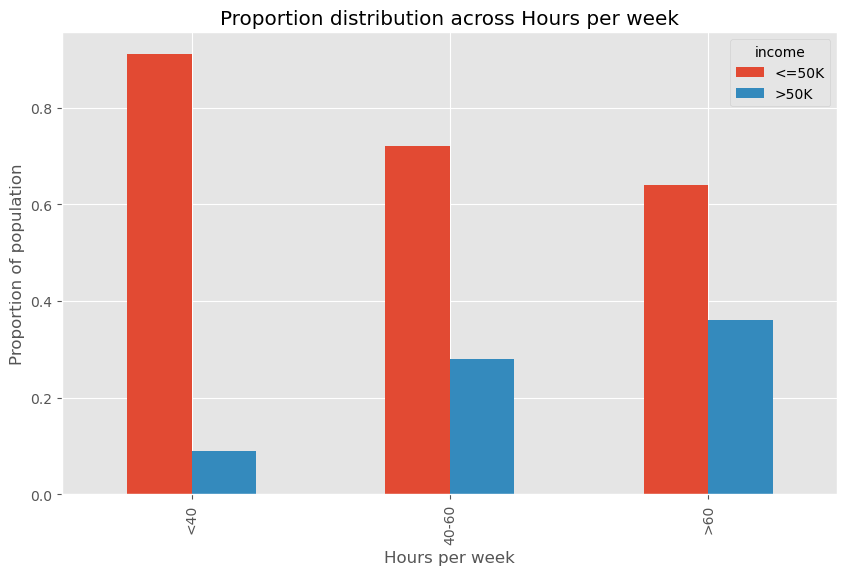

In [102]:
printmd('### 2.7.1 Hours per week with categories')

adult['hour_worked_bins'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in adult['hours-per-week']]
adult['hour_worked_bins'] = adult['hour_worked_bins'].astype('category')
hours_per_week = round(pd.crosstab(adult.hour_worked_bins, adult.income).div(pd.crosstab(adult.hour_worked_bins, adult.income).apply(sum,1),0),2)

hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

printmd('Therefore, I decided to transform this column into 3 categories, less than 40 hours, \
        40 to 60 hours and greater than 60 hours. Plotting a bar graph with these 3 categories, \
        we can see from the figure below that there is an increasing trend in the proportion of \
        population making more than 50k a year.')

### 2.7.2 Hours worked across working classes

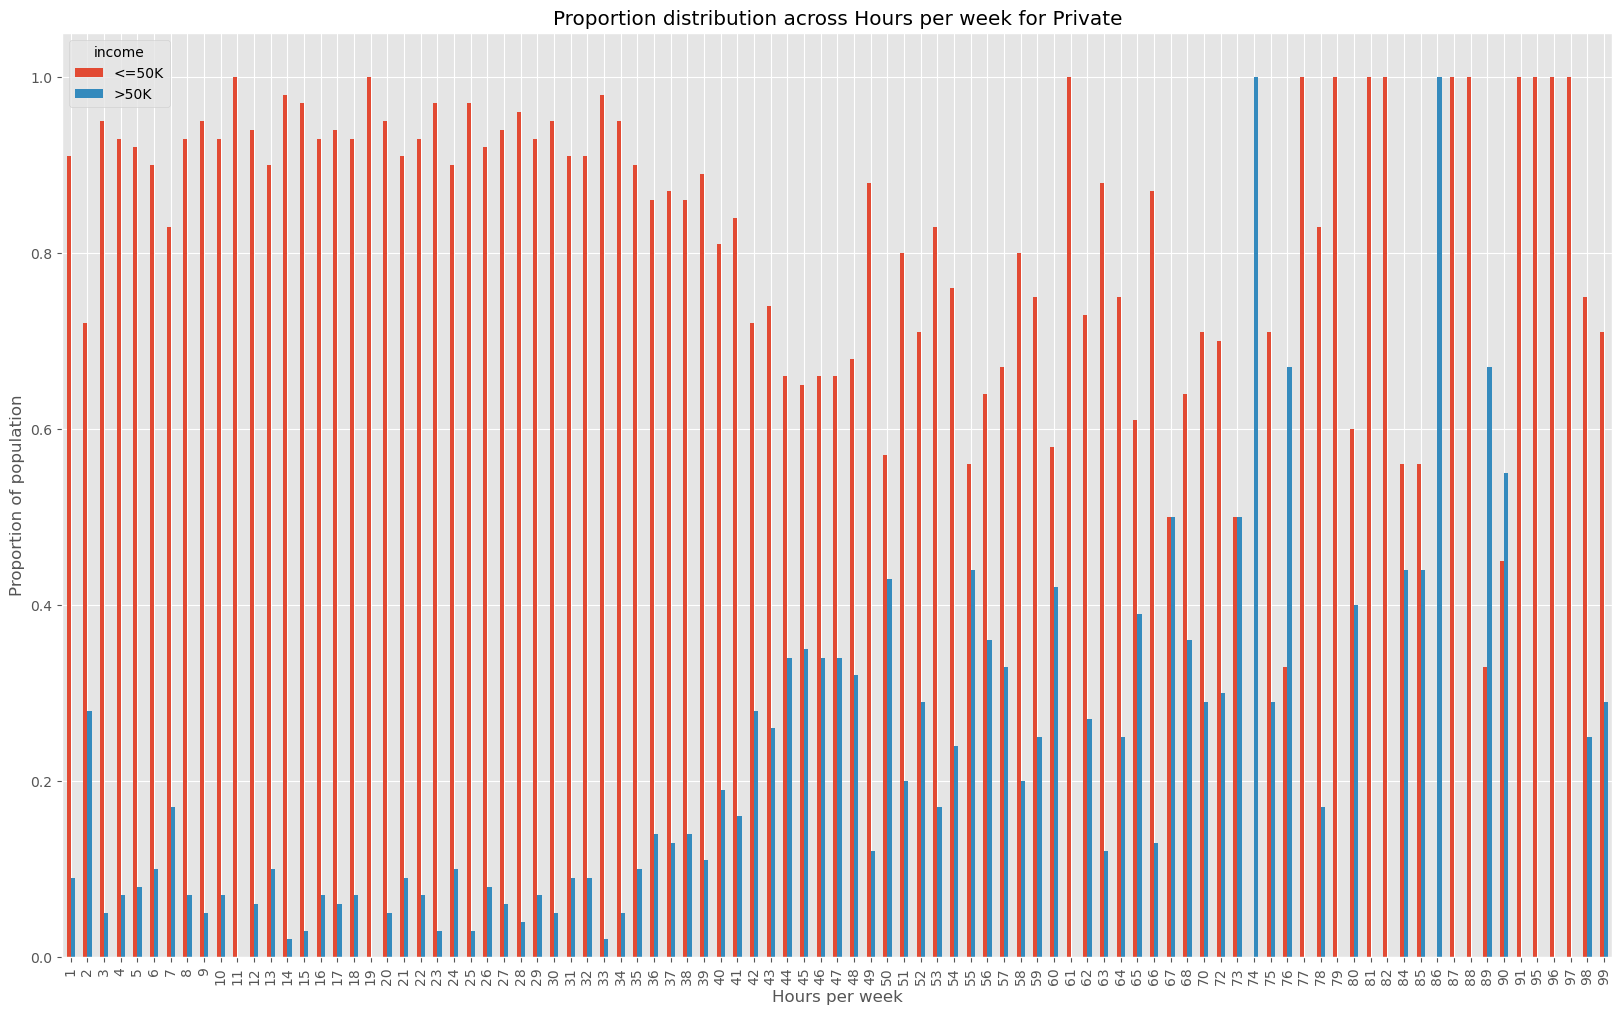

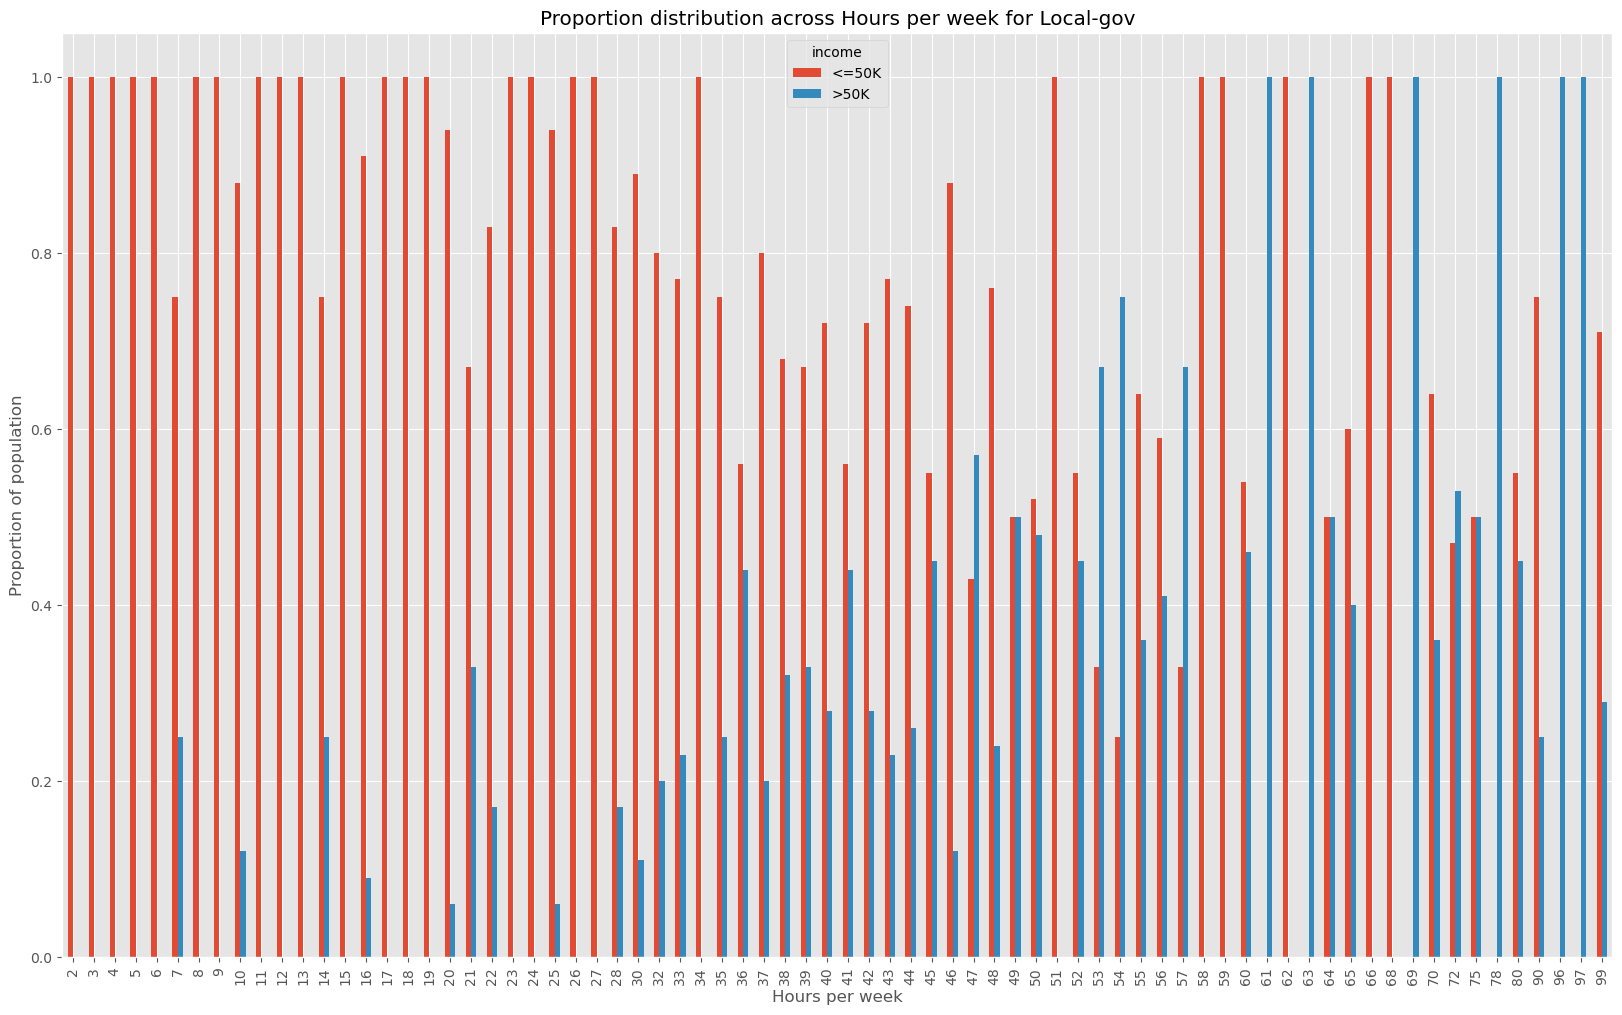

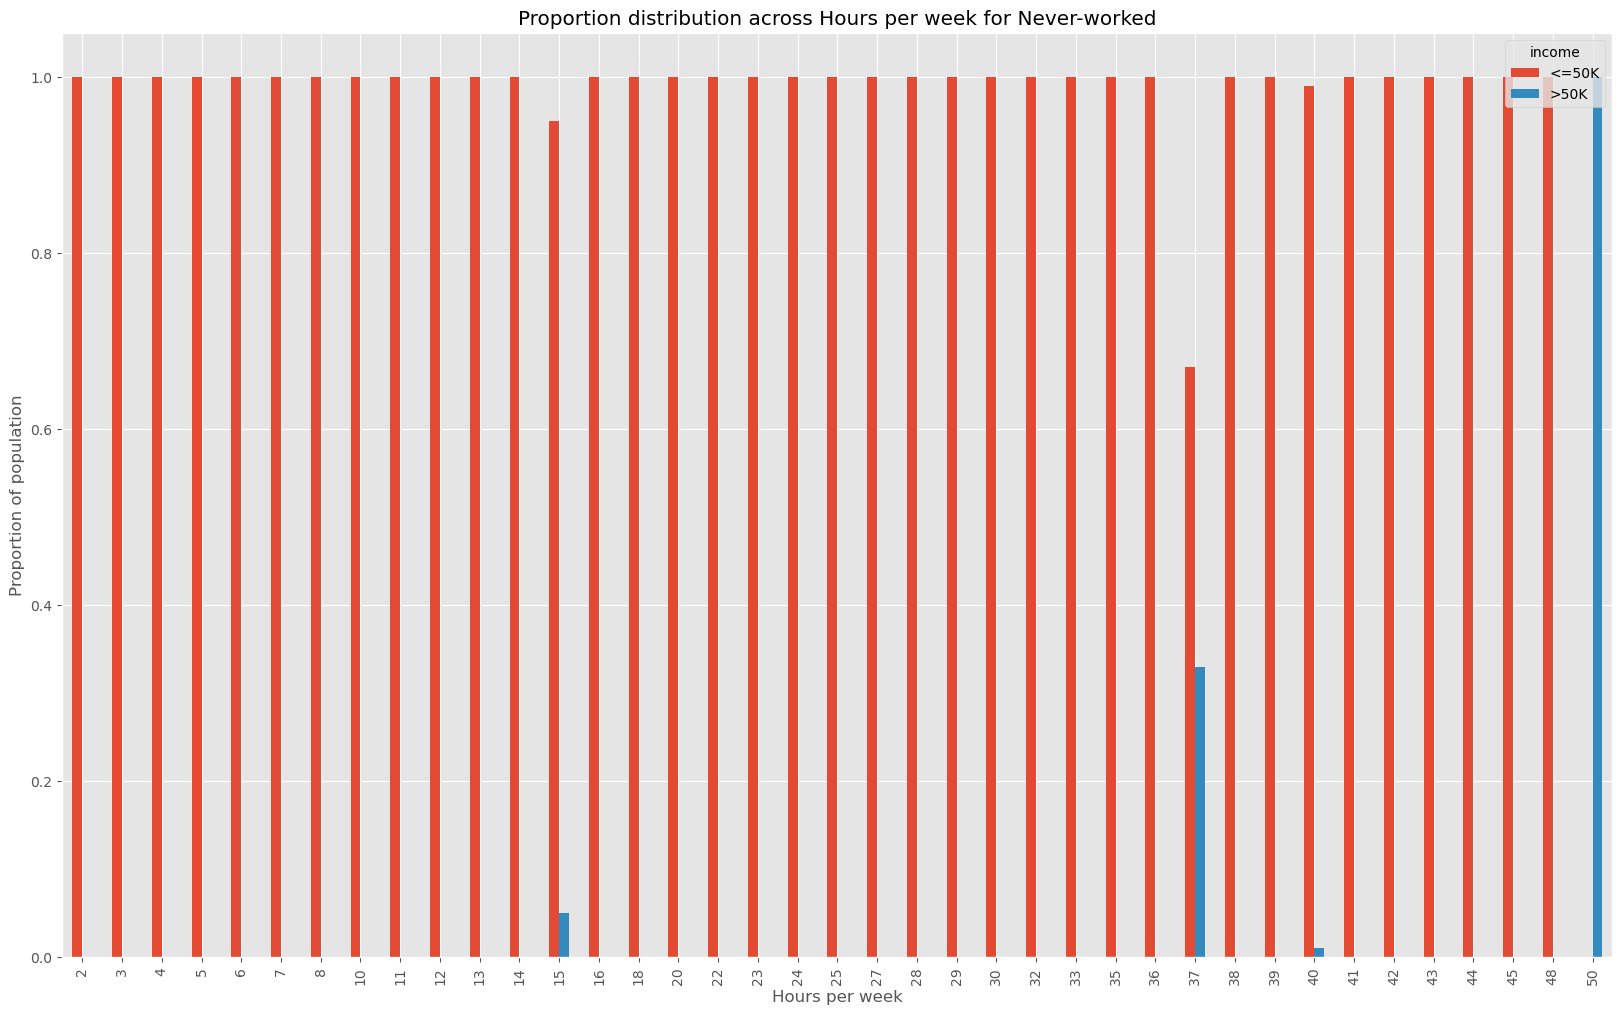

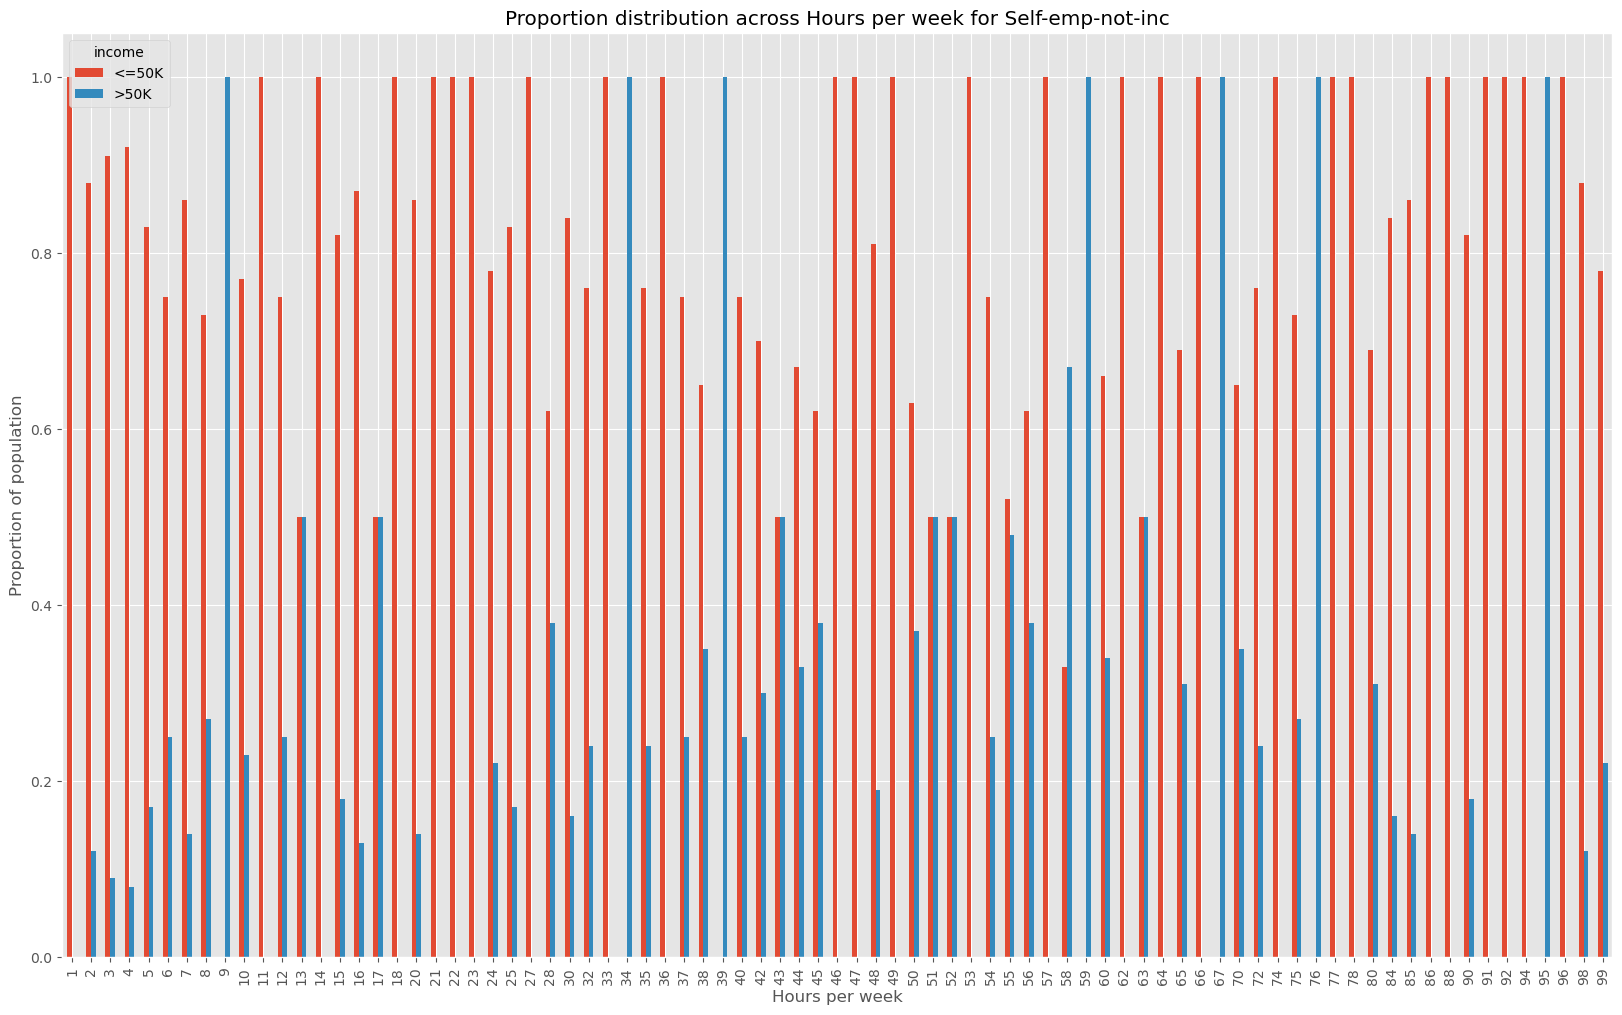

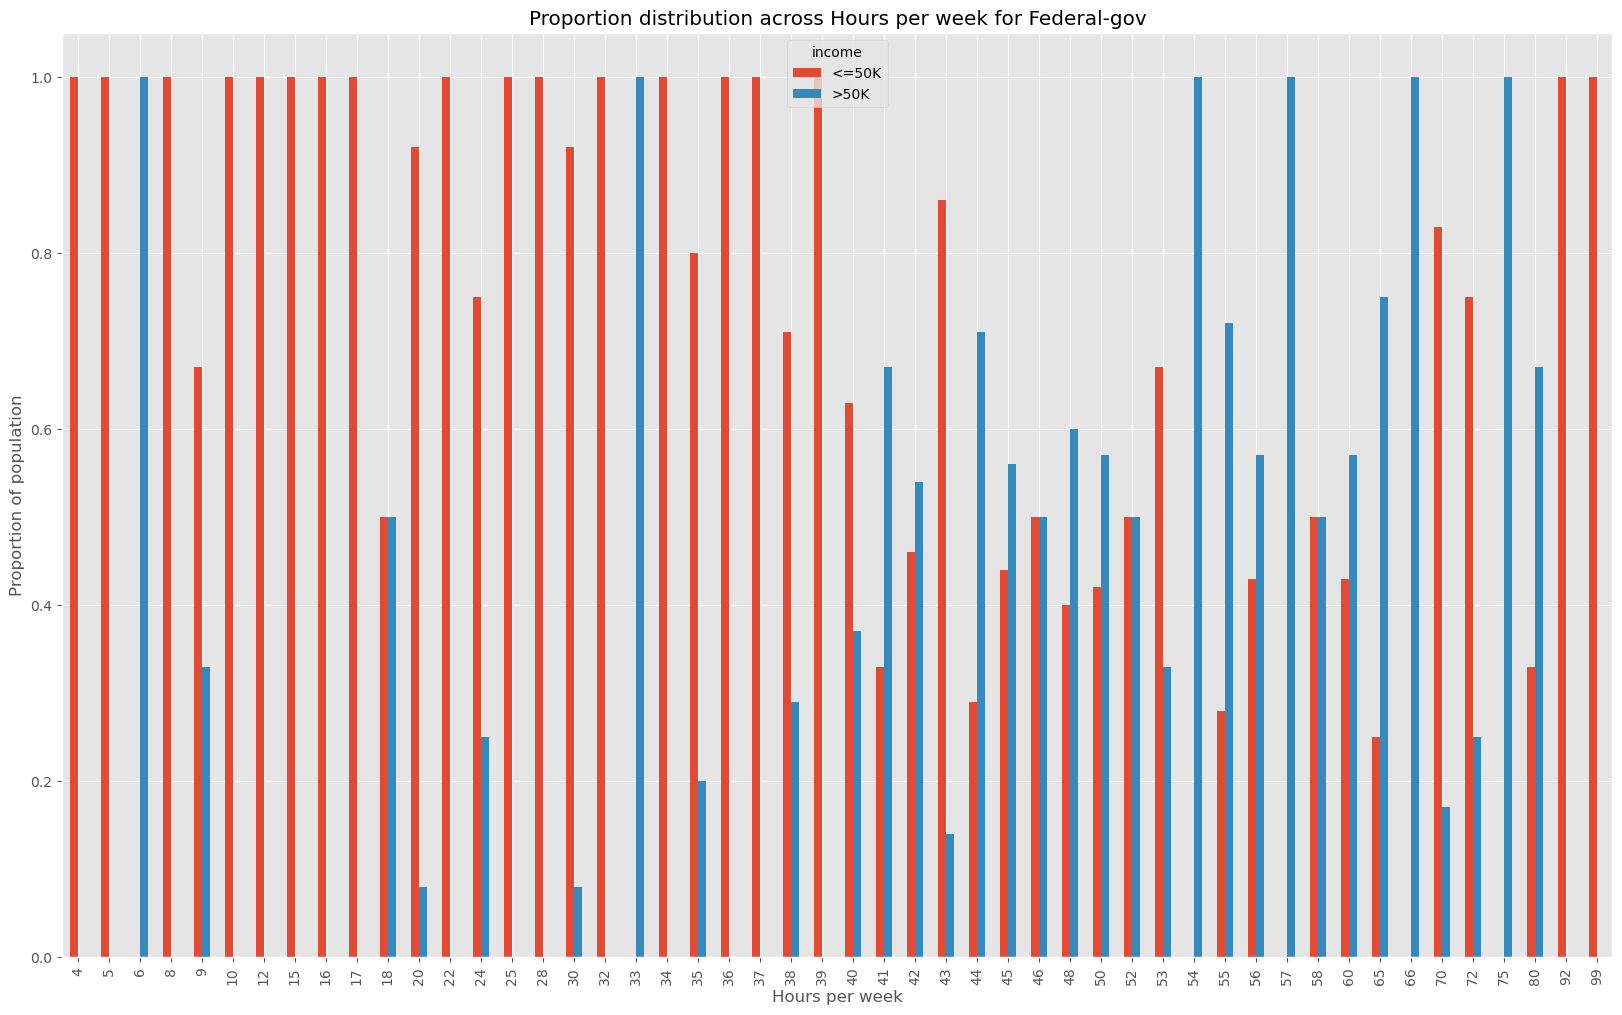

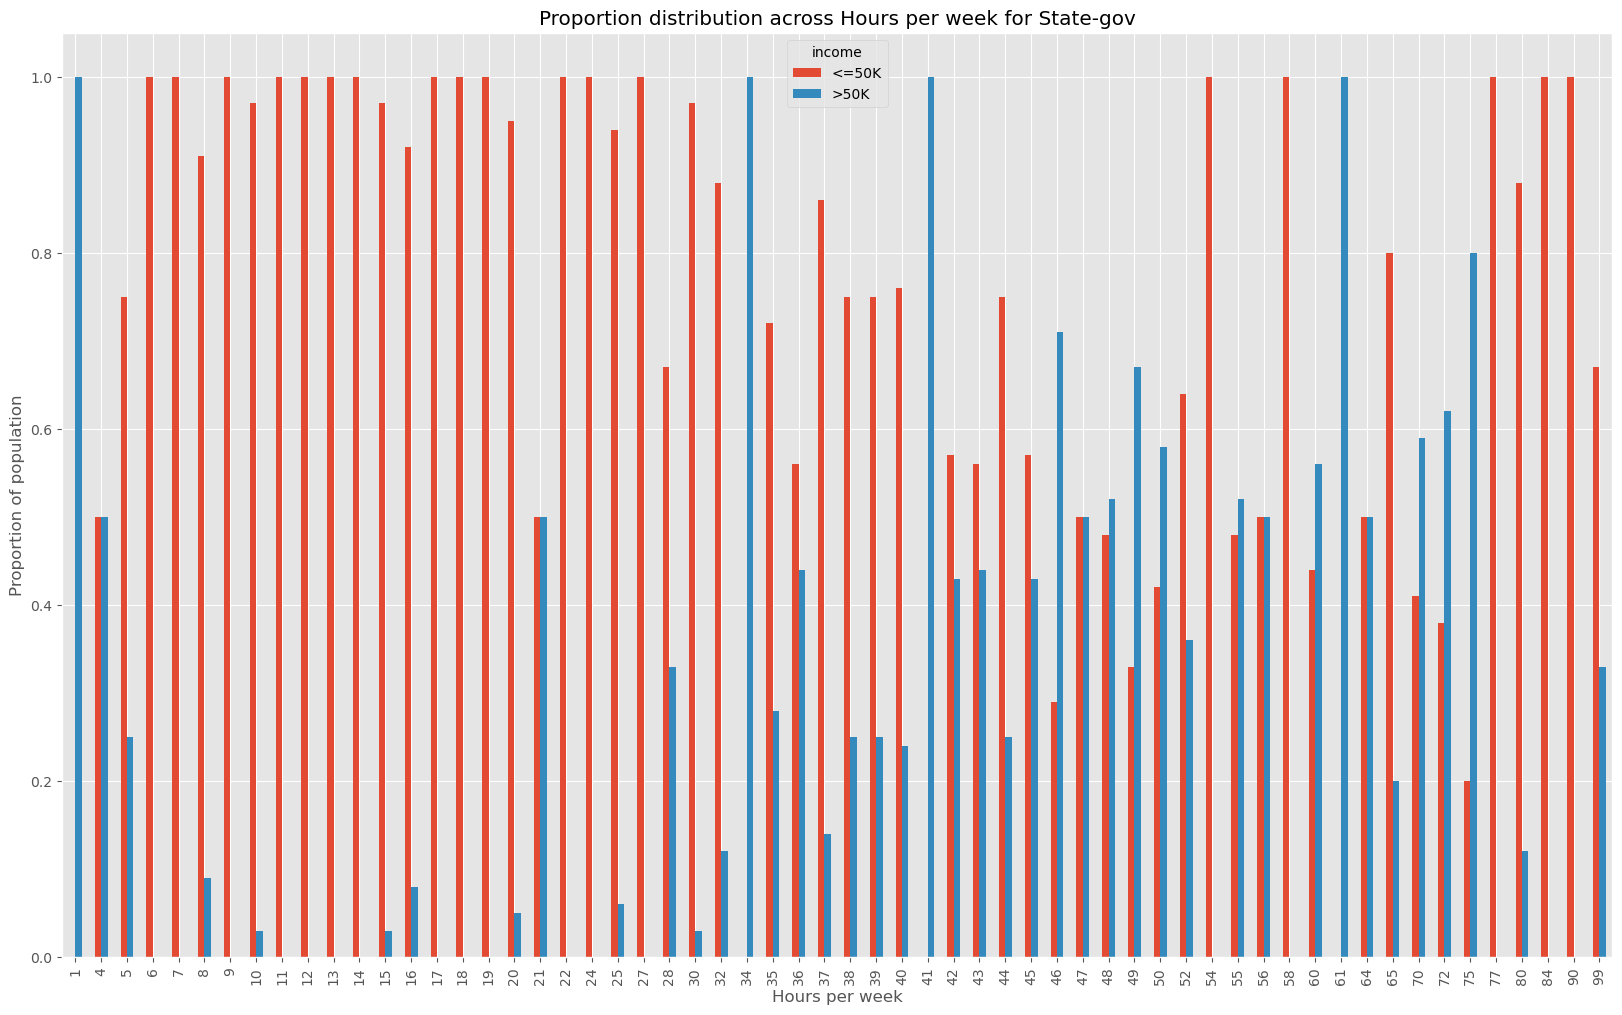

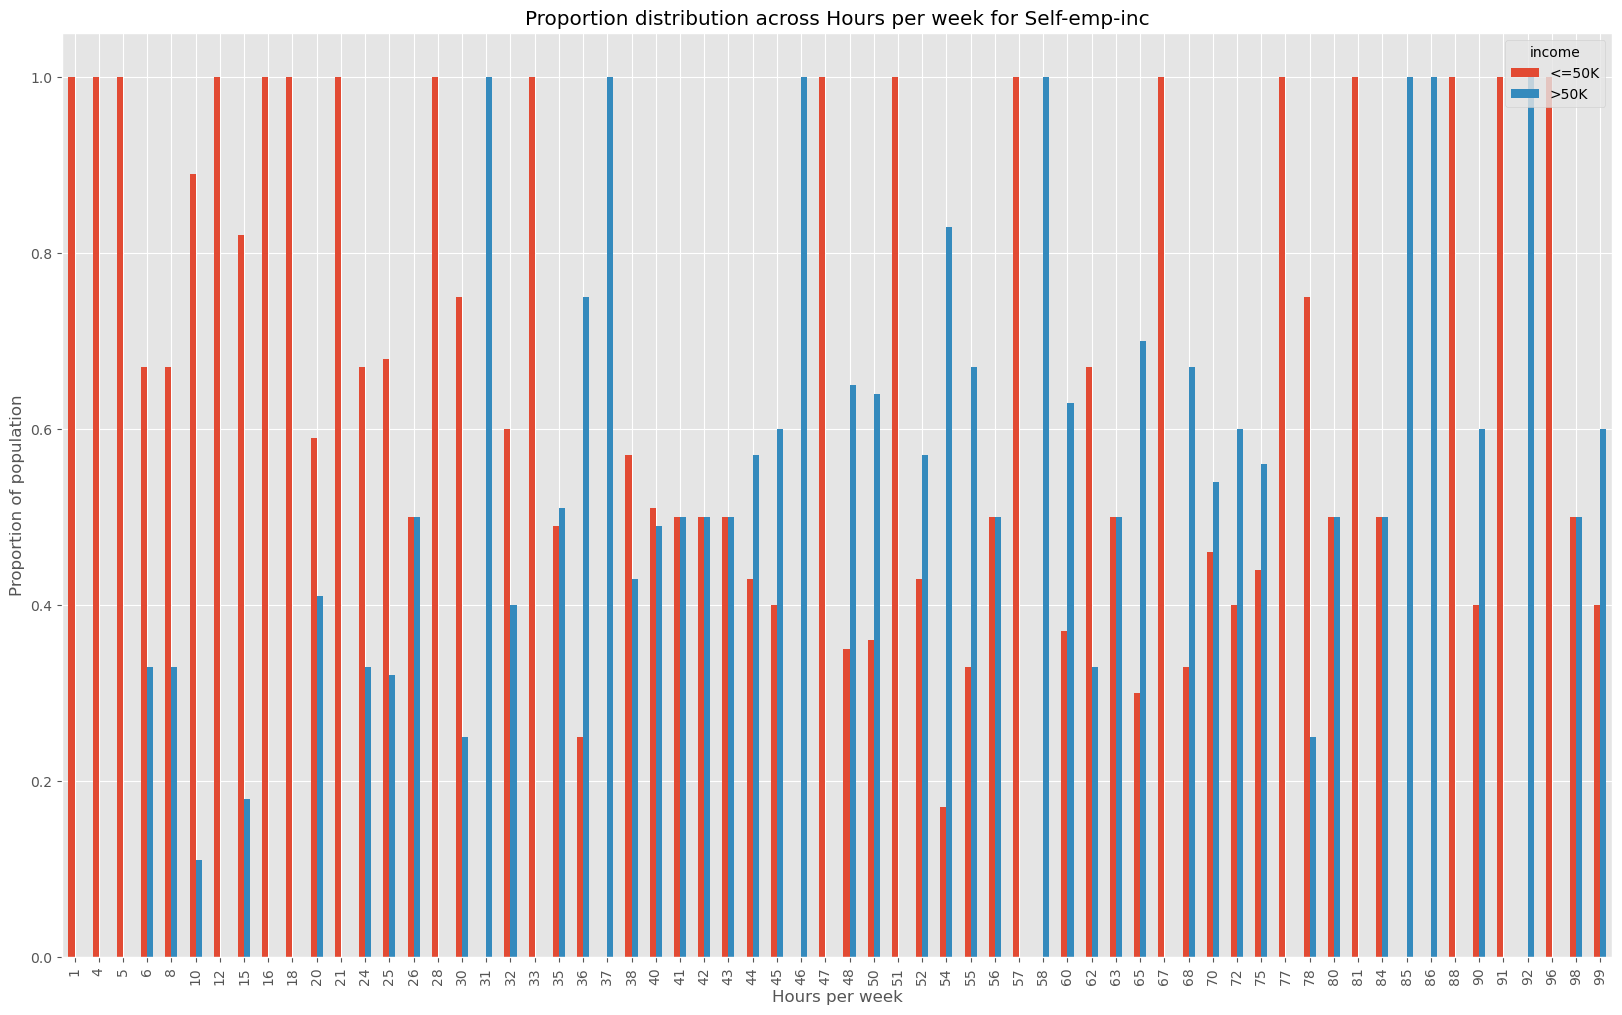

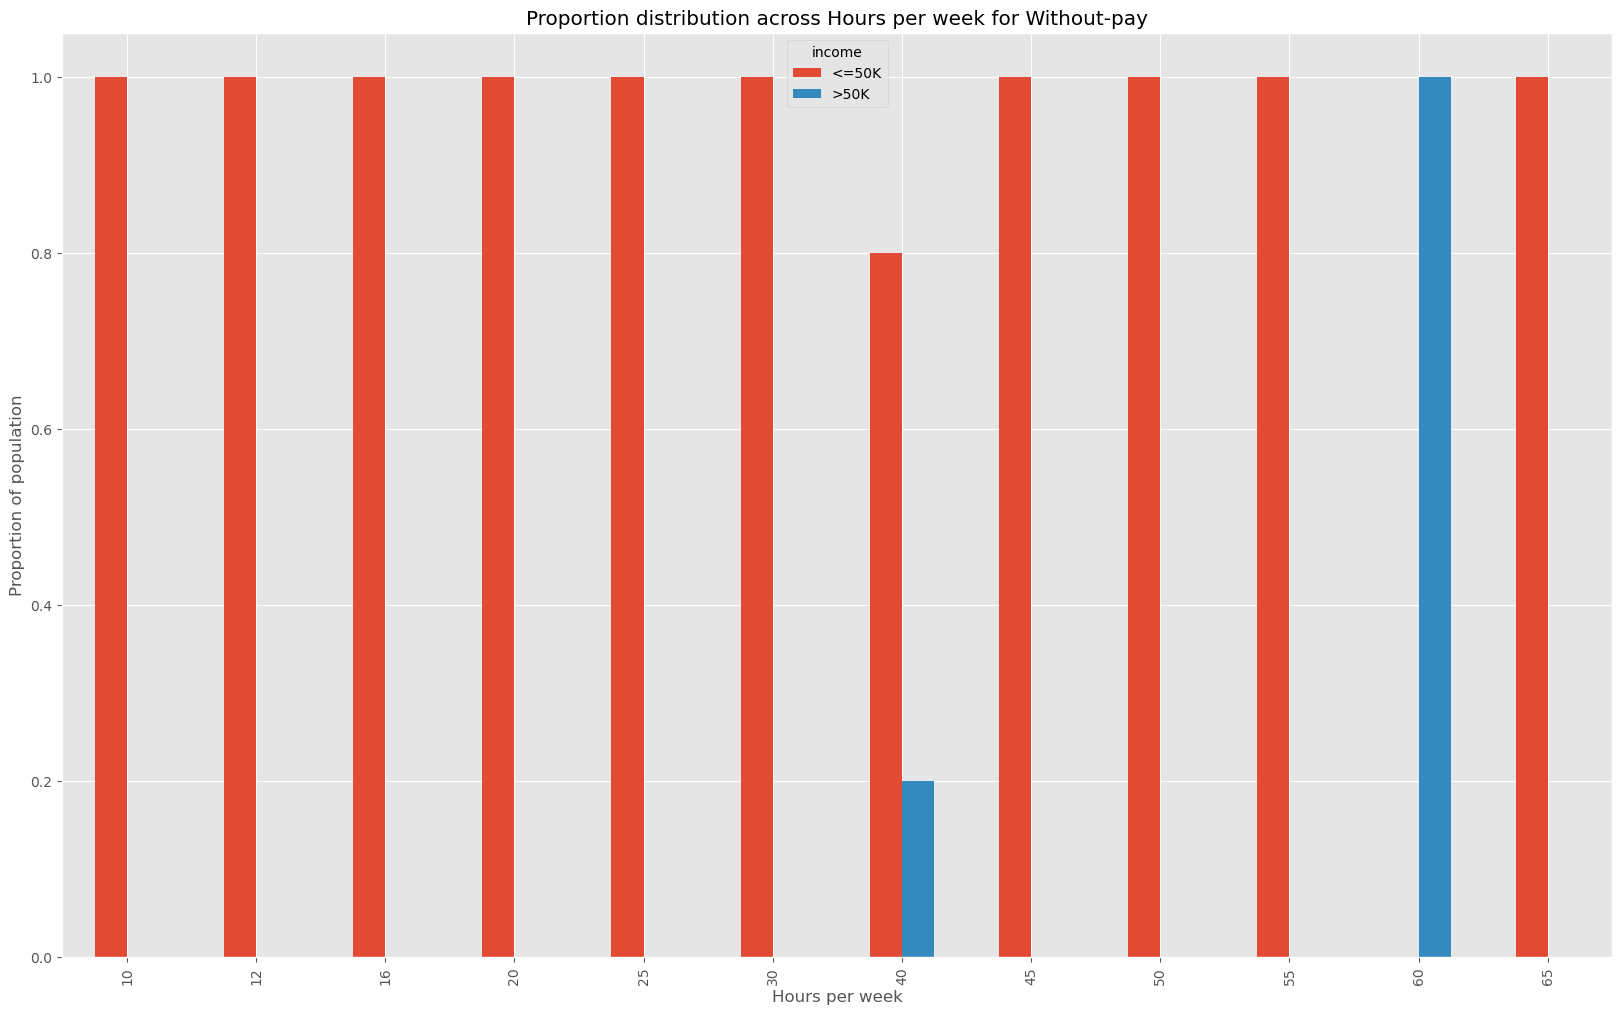

In [103]:
printmd('### 2.7.2 Hours worked across working classes')

for i in adult.workclass.unique():
    df = adult[adult.workclass == i]

    hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
    # hours_per_week.sort_values(by = '>50K', inplace = True)
    ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week for '+ i, figsize = (20,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')

    print()

# 3. Data Transformations

# 3.1. Feature Selection

In [104]:
printmd('* For education level, we have 2 features that convey the same meaning, \'education\' \
        and \'educational-num\'. To avoid the effect of this attribute on the models to be \
        overstated, I am not going to use the categorical education attribute.')
printmd('* I use the categorical Hours work column and drop the \'hour-per-week\' column')
printmd('* Also, I chose not to use the \'Fnlwgt\' attribute that is used by the census, \
        as the inverse of sampling fraction adjusted for non-response and over or under sampling \
        of particular groups. This attribute does not convey individual related meaning.')

* For education level, we have 2 features that convey the same meaning, 'education'         and 'educational-num'. To avoid the effect of this attribute on the models to be         overstated, I am not going to use the categorical education attribute.

* I use the categorical Hours work column and drop the 'hour-per-week' column

* Also, I chose not to use the 'Fnlwgt' attribute that is used by the census,         as the inverse of sampling fraction adjusted for non-response and over or under sampling         of particular groups. This attribute does not convey individual related meaning.

In [105]:
#adult['income'].replace({'<=50K':0,'>50K':1},inplace=True)
#adult_new=adult_new.drop('education.num',axis=1)


C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\li

BoxPlots of the features:


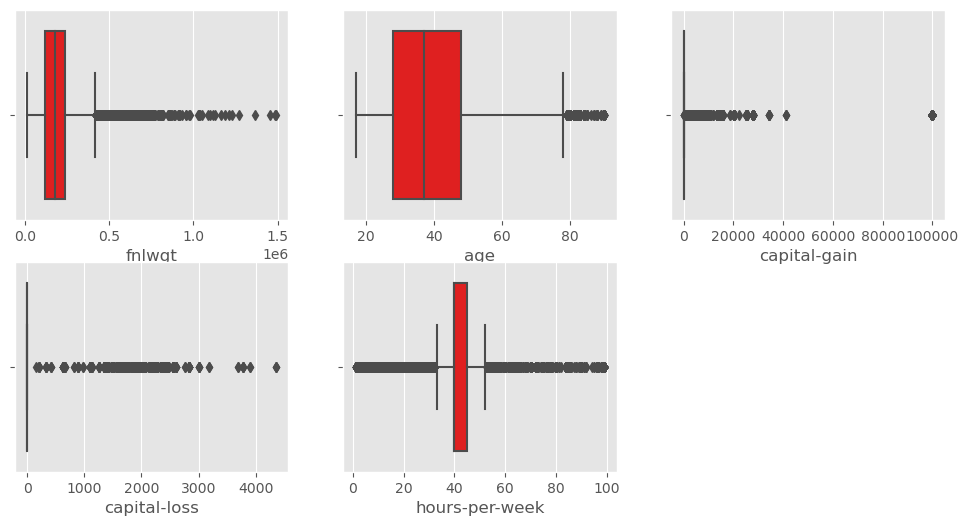

In [106]:
plt.style.use('default')
plt.style.use('ggplot')
clist = ['fnlwgt','age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(adult[clist[i]], color = 'red')
print("BoxPlots of the features:")
plt.show()

In [107]:
from scipy.stats import zscore
zabs = np.abs(zscore(adult[clist]))
print(np.shape(np.where(zabs >= 3)))
adult =adult[(zabs < 3).all(axis = 1)]
adult

(2, 3920)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,hour_worked_bins
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,40-60
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,40-60
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,40-60
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,40-60
4,18,Never-worked,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,<40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,<40
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,40-60
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,40-60
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,<40


# 3.2 Normalization

In [47]:
#printmd('## Box plot')
#adult.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

In [48]:
# Remove education and fnlwgt
#adult.drop(columns = ['education','fnlwgt','hours-per-week'], inplace = True)

In [49]:
#printmd('## Box plot')
#adult.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

In [108]:
printmd ('Normalization happens on the training dataset, by removing the mean and \
        scaling to unit variance. These values are stored and then later applied  \
        to the test data before the test data is passed to the model for prediction. ')

Normalization happens on the training dataset, by removing the mean and         scaling to unit variance. These values are stored and then later applied          to the test data before the test data is passed to the model for prediction. 

# 4. Model Development & Classification

# 4.1. Data Preparation'
One-hot encoding is the process of representing multi-class categorical features as binary features, one for each class. Although this process increases the dimensionality of the dataset, classification algorithms tend to work better on this format of data.

I use one-hot encoding to represent all the categorical features in the dataset.

In [109]:
# Data Prep
adult_data = adult.drop(columns = ['income'])
adult_label = adult.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')

In [110]:
adult_data_1hot.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,hour_worked_bins_40-60,hour_worked_bins_<40,hour_worked_bins_>60
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [111]:
# Train - Test split
train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.20)

In [112]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

In [117]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

# 4.2. Model Development

## 4.2.1. Decision Tree

**For the decision tree classifier, I experimented with the splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.**

**<br>1.Splitting criteria:** Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)</br>
**<br>2.Min samples required to split:** 5% (Best amongst 1%, 10% and 5%.)</br>
**<br>3.Max Depth:** None</br>
**<br>4.Min samples required at leaf:** 0.1 % (Best amongst 1%, 5% and 0.1%.)</br>
**<br>5.Max features:** number of features (Performs better than 'auto', 'log2' and 'sqrt'.)</br>

In [118]:
printmd('### 3.1.1. Model Development ')

# Entropy
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(train_data, train_label)
clf_entropy_pred = clf_entropy.predict(test_data)
DTree_Entropy = model_eval(test_label, clf_entropy_pred)
print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))

# Gini 
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)
DTree_Gini = model_eval(test_label, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))


printmd('### 3.1.2. Model Evaulation ')
ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Gini','DTree_Entropy']),4)
display(ovl_dtree)

### 3.1.1. Model Development 

Desicion Tree using Entropy : 85.37 percent.
Desicion Tree using Gini Index : 85.37 percent.


### 3.1.2. Model Evaulation 

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTree_Gini,0.8537,0.7604,0.4952,0.5998,0.4952,0.9556,0.1463
DTree_Entropy,0.8537,0.7600,0.4957,0.6001,0.4957,0.9555,0.1463


# 4.2.2. Artificial Neural Network

**For the ANN classifier, I experimented with the activation function, the solver for weight optimization, regularization term and learning schedule for weight updates. The following values of the parameters attained the best accuracy during classification. Other parameters were neither applicable to the 'adam' solver nor did it improve the performance of the model. Results in the table below.**

<br>->.Activation: Logistic (Marginally outperformed 'relu', 'tanh' and 'identity' functions.)</br>
<br>->.Solver: Adam (Works well on relatively large datasets with thousands of training samples or more)</br>
<br>->Alpha: 1e-4 (Best amongst 1, 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)</br>
<br>->.Learning Rate: 'invscaling' (Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'.)</br>

In [119]:
# Relu
ann_relu = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-1, 
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate  = 'invscaling',
                    warm_start = True)
ann_relu.fit(train_data, train_label)                         
ann_relu_pred = ann_relu.predict(test_data)
ANN_relu = model_eval(test_label, ann_relu_pred)
print('ANN using relu and adam solver : %.2f percent.' % (round(ANN_relu['accuracy']*100,2)))


ANN using relu and adam solver : 85.41 percent.


In [120]:
# Log
ann_log = MLPClassifier(activation = 'logistic', solver='adam', 
                    alpha=1e-4, hidden_layer_sizes=(5, 2),
                    learning_rate  = 'invscaling', 
                    random_state=1, warm_start = True)
ann_log.fit(train_data, train_label)                         
ann_log_pred = ann_log.predict(test_data)
ANN_log = model_eval(test_label, ann_log_pred)
print('ANN using logistic and adam solver : %.2f percent.' % (round(ANN_log['accuracy']*100,2)))


ANN using logistic and adam solver : 85.11 percent.


In [121]:
# Identity
ann_identity = MLPClassifier(activation = 'identity', solver='adam', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann_identity.fit(train_data, train_label)                         
ann_identity_pred = ann_identity.predict(test_data)
ANN_identity = model_eval(test_label, ann_identity_pred)
print('ANN using identity and adam solver : %.2f percent.' % (round(ANN_identity['accuracy']*100,2)))

#printmd('### 3.2.2. Model Evaulation ')
ovl_ann = round(pd.DataFrame([ANN_relu, ANN_log, ANN_identity], index = ['ANN_relu', 'ANN_log', 'ANN_identity']),4)
display(ovl_ann)

ANN using identity and adam solver : 85.36 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
ANN_relu,0.8541,0.7071,0.5815,0.6382,0.5815,0.9315,0.1459
ANN_log,0.8511,0.7079,0.5569,0.6234,0.5569,0.9347,0.1489
ANN_identity,0.8536,0.7162,0.5610,0.6292,0.5610,0.9368,0.1464


# 4.2.3. Support Vector Machine
**For the SVM classifier, I experimented with the various available kernels, the penalty of the error term and the tolerance for stopping criteria. The following values of the parameters attained the best accuracy during classification. Results in the table below.**

**<br>Kernel: rbf (Marginally outperformed 'linear, 'poly' and 'sigmoid' kernels.)</br>
<br>C, penalty of the error term: 1 (Best amongst 0.1, 0.5, 1 and 10)</br>
<br>Tolerance for stopping criteria: 1e-3 (Best amongst 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)</br>**

In [122]:
# rbf kernal
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(train_data, train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(test_data)
SVM_rbf = model_eval(test_label, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))

SVM using rbf kernel : 85.22 percent.


In [123]:
# Linear kernel
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_linear.fit(train_data, train_label)
svm_clf_linear_pred = svm_clf_linear.predict(test_data)
SVM_linear = model_eval(test_label, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))

SVM using linear kernel : 84.49 percent.


In [124]:
# Poly kernal
svm_clf_poly = svm.SVC(kernel = 'poly')
svm_clf_poly.fit(train_data, train_label)
svm_clf_poly_pred = svm_clf_poly.predict(test_data)
SVM_poly = model_eval(test_label, svm_clf_poly_pred)
print('SVM using poly kernel : %.2f percent.' % (round(SVM_poly['accuracy']*100,2)))

SVM using poly kernel : 84.76 percent.


In [125]:
# sigmoid kernel
svm_clf_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_clf_sigmoid.fit(train_data, train_label)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(test_data)
SVM_sigmoid = model_eval(test_label, svm_clf_sigmoid_pred)
print('SVM using sigmoid kernel : %.2f percent.' % (round(SVM_sigmoid['accuracy']*100,2)))


SVM using sigmoid kernel : 82.85 percent.


In [126]:
printmd('### 3.3.2. Model Evaulation ')
ovl_svm = round(pd.DataFrame([SVM_rbf, SVM_linear, SVM_poly, SVM_sigmoid], index = ['SVM_rbf','SVM_linear', 'SVM_poly', 'SVM_sigmoid']),4)
display(ovl_svm)

### 3.3.2. Model Evaulation 

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
SVM_rbf,0.8522,0.7420,0.5093,0.6040,0.5093,0.9497,0.1478
SVM_linear,0.8449,0.7126,0.5013,0.5885,0.5013,0.9425,0.1551
SVM_poly,0.8476,0.7451,0.4737,0.5791,0.4737,0.9539,0.1524
SVM_sigmoid,0.8285,0.6331,0.5359,0.5804,0.5359,0.9117,0.1715


# 4.2.4. Ensemble Models

## 4.2.4.1. Random Forest

**For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.**

**<br>Num estimators: 100 (Best amongst 10, 50 and 100)</br>
<br>Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)</br>
<br>Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)</br>
<br>Max Depth: None</br>
<br>Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)</br>
<br>Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)</br>**

In [127]:
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(train_data, train_label)
r_forest_gini_pred = r_forest_gini.predict(test_data)
rforest_gini = model_eval(test_label, r_forest_gini_pred)
print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(train_data, train_label)
r_forest_entropy_pred = r_forest_entropy.predict(test_data)
rforest_entropy = model_eval(test_label, r_forest_entropy_pred)
print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

#printmd('### 3.4.1.2. Model Evaulation ')
ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 85.32 percent.
Random Forest using Entropy : 85.34 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
rforest_gini,0.8532,0.7599,0.4922,0.5974,0.4922,0.9558,0.1468
rforest_entropy,0.8534,0.7559,0.4987,0.6010,0.4987,0.9542,0.1466


# 4.2.4.2. Adaboost
**For the adaboost classifier, I experimented with base estimator from which the boosted ensemble is built and number of estimators. The following values of the parameters attained the best accuracy during classification. Results in the table below.**

**<br>Base Estimator: DecisionTreeClassifier</br>
<br>Num estimators: 100 (Best amongst 10, 50 and 100.)</br>**

In [128]:
ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
adaboost = model_eval(test_label, ada_pred)
print('Adaboost : %.2f percent.' % (round(adaboost['accuracy']*100,2)))

#printmd('### 3.4.2.2. Model Evaulation ')
ovl_ada = round(pd.DataFrame([adaboost], index = ['adaboost']),4)
display(ovl_ada)

Adaboost : 86.21 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8621,0.7498,0.5655,0.6447,0.5655,0.9464,0.1379


# 4.2.5. Logistic Regression

In [129]:
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

#printmd('### 3.5.2. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression : 85.40 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.854,0.7257,0.5469,0.6237,0.5469,0.9412,0.146


# 4.2.6. k Nearest Neighbours
For the K nearest neighbours classifier, I experimented with the num of neighbours values, every odd number ranging from 1 to 50.

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn_outs = []
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data, train_label) 
    knn_pred = knn.predict(test_data)
    knn_perf = model_eval(test_label, knn_pred)
    knn_perf['k'] = i
    knn_outs.append(knn_perf)

ovl_knn = round(pd.DataFrame(knn_outs),4)
display(ovl_knn)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,k
0,0.8020,0.5541,0.5399,0.5469,0.5399,0.8765,0.1980,1
1,0.8278,0.6236,0.5595,0.5898,0.5595,0.9040,0.1722,3
2,0.8368,0.6539,0.5575,0.6018,0.5575,0.9161,0.1632,5
3,0.8366,0.6586,0.5439,0.5958,0.5439,0.9199,0.1634,7
4,0.8362,0.6621,0.5309,0.5893,0.5309,0.9230,0.1638,9
5,0.8402,0.6733,0.5399,0.5993,0.5399,0.9256,0.1598,11
6,0.8412,0.6778,0.5384,0.6001,0.5384,0.9273,0.1588,13
7,0.8408,0.6775,0.5354,0.5981,0.5354,0.9276,0.1592,15
8,0.8403,0.6794,0.5273,0.5938,0.5273,0.9293,0.1597,17
9,0.8411,0.6822,0.5278,0.5952,0.5278,0.9301,0.1589,19


# 5. Model Evaluation
### 5.1. Overall Performance Statistics

In [131]:
overall_eval = pd.concat([ovl_dtree, ovl_ann, ovl_svm, ovl_rf, ovl_ada, ovl_logreg], axis = 0)
overall_eval.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)

printmd('Combing the performance statistics of all the model developed, as seen in table below, \
        we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7812) \
        and accuracy (0.8647). The Artificial neural network models are only marginally being in terms of \
        accuracy and F-measure. Almost all the model have an accuracy greater than 0.84, expect for two SVM \
        models. The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and \
        specificity of all the models developed.')

display(overall_eval)

Combing the performance statistics of all the model developed, as seen in table below,         we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7812)         and accuracy (0.8647). The Artificial neural network models are only marginally being in terms of         accuracy and F-measure. Almost all the model have an accuracy greater than 0.84, expect for two SVM         models. The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and         specificity of all the models developed.

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8621,0.7498,0.5655,0.6447,0.5655,0.9464,0.1379
ANN_relu,0.8541,0.7071,0.5815,0.6382,0.5815,0.9315,0.1459
ANN_identity,0.8536,0.7162,0.5610,0.6292,0.5610,0.9368,0.1464
logistic_reg,0.8540,0.7257,0.5469,0.6237,0.5469,0.9412,0.1460
ANN_log,0.8511,0.7079,0.5569,0.6234,0.5569,0.9347,0.1489
SVM_rbf,0.8522,0.7420,0.5093,0.6040,0.5093,0.9497,0.1478
rforest_entropy,0.8534,0.7559,0.4987,0.6010,0.4987,0.9542,0.1466
DTree_Entropy,0.8537,0.7600,0.4957,0.6001,0.4957,0.9555,0.1463
DTree_Gini,0.8537,0.7604,0.4952,0.5998,0.4952,0.9556,0.1463
rforest_gini,0.8532,0.7599,0.4922,0.5974,0.4922,0.9558,0.1468


# 5.1. ROC Curve

In [133]:
def generateRoc(test_data, test_label, classifiers, pred_labels, plot_labels, limiter):
    
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    y_test = label_binarize(test_label, classes=['<=50K', '>50K'])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index('>50K')
        
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
                               
        lw = 2
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=lw, label=plot_labels[i])
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

<IPython.core.display.Javascript object>


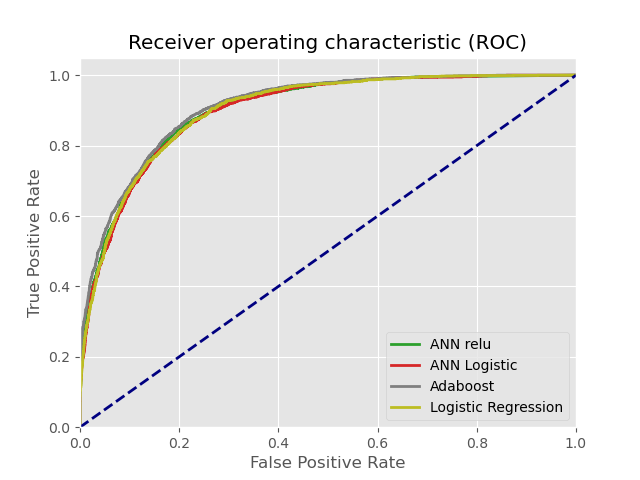

In [136]:
%matplotlib notebook
classifier_list = [clf_gini
                ,clf_entropy
                ,ann_relu
                ,ann_log
                ,ann_identity
#                 ,svm_clf_rbf
#                 ,svm_clf_linear
#                 ,svm_clf_poly
#                 ,svm_clf_sigmoid
                ,r_forest_gini
                ,r_forest_entropy
                ,ada
                ,log_reg
                ] 
pred_list = [clf_gini_pred
            ,clf_entropy_pred
            ,ann_relu_pred
            ,ann_log_pred
            ,ann_identity_pred
#             ,svm_clf_rbf_pred
#             ,svm_clf_linear_pred
#             ,svm_clf_poly_pred
#             ,svm_clf_sigmoid_pred
            ,r_forest_gini_pred
            ,r_forest_entropy_pred
            ,ada_pred
            ,log_reg_pred
            ]

clf_labels = ['DTree Gini'
            ,'DTree Entropy'
            ,'ANN relu'
            ,'ANN Logistic'
            ,'ANN Identity'
#             ,svm_clf_rbf_pred
#             ,svm_clf_linear_pred
#             ,svm_clf_poly_pred
#             ,svm_clf_sigmoid_pred
            ,'RForest Gini'
            ,'RForest Entropy'
            ,'Adaboost'
            ,'Logistic Regression'
            ]

limiter = ['Adaboost', 'ANN relu', 'ANN Logistic', 'Logistic Regression']
generateRoc(test_data, test_label, classifier_list, pred_list, clf_labels, limiter)


The plot above of the receiver operating characteristic curve for the top 5 models; Adaboost, ANN with logistics activation function, ANN with relu activation function, ANN with tanH activation function and logistic regression model. I chose to plot only the top 5 models as the ROC curves of most of the models overlap and the it is not easy to interpret the curve.

From figure, we can see that the ROC curve of the Adaboost model has the highest lift and is closest to the top left corner (TPR of 1 and FPR of 0) of the plot. The Adaboost model's curve clearly separates itself from the ROC curves of the other 4 models, which overlap with each other.

# 5. Conclusion
I choose Adaboost model as my preferred my approach. The Adaboost model not only has the highest accuracy, but also has the highest precision and F-measure of all the models developed as a part of this analysis. The advantages of using Adaboost over other models is that they are very simple to implement. Since they are made up of weak individual learners, they are less susceptible to overfitting. However, Adaboost is sensitive to noisy data and outliers.